## CS418
### EDA - Past Match-up analysis



In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import get_data
import time
import requests
from bs4 import BeautifulSoup
from nba_api.stats.endpoints import leaguegamefinder

In [22]:
# Fetch the regular season schedule for the 2024-25 season
df_schedule = get_data.fetch_regular_season_schedule(season='2024-25')
df_schedule = df_schedule[df_schedule['WL'].isin(['W', 'L'])]
# Display the first few rows of the DataFrame
df_schedule.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
2,22024,1610612763,MEM,Memphis Grizzlies,0022401093,2025-03-31,MEM vs. BOS,L,240,103,...,0.625,5,40,45,21,9,3,10,16,-14.0
3,22024,1610612760,OKC,Oklahoma City Thunder,0022401094,2025-03-31,OKC vs. CHI,W,240,145,...,0.783,9,35,44,39,11,6,14,16,28.0
4,22024,1610612751,BKN,Brooklyn Nets,0022401095,2025-03-31,BKN @ DAL,W,240,113,...,0.750,7,33,40,32,6,3,8,23,4.0
5,22024,1610612741,CHI,Chicago Bulls,0022401094,2025-03-31,CHI @ OKC,L,240,117,...,0.813,10,33,43,29,7,7,19,16,-28.0
6,22024,1610612753,ORL,Orlando Magic,0022401091,2025-03-31,ORL vs. LAC,L,241,87,...,0.909,6,26,32,18,10,4,14,17,-9.0


In [23]:
df_schedule.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2250 entries, 2 to 2251
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   SEASON_ID          2250 non-null   object        
 1   TEAM_ID            2250 non-null   int64         
 2   TEAM_ABBREVIATION  2250 non-null   object        
 3   TEAM_NAME          2250 non-null   object        
 4   GAME_ID            2250 non-null   object        
 5   GAME_DATE          2250 non-null   datetime64[ns]
 6   MATCHUP            2250 non-null   object        
 7   WL                 2250 non-null   object        
 8   MIN                2250 non-null   int64         
 9   PTS                2250 non-null   int64         
 10  FGM                2250 non-null   int64         
 11  FGA                2250 non-null   int64         
 12  FG_PCT             2250 non-null   float64       
 13  FG3M               2250 non-null   int64         
 14  FG3A         

### DATA DESCRIPTION
SEASON_ID: The ID representing the NBA season (e.g., "22024" for the 2024-25 season).

TEAM_ID: A unique identifier for each NBA team.

TEAM_ABBREVIATION: The abbreviated name of the team (e.g., "LAL" for Los Angeles Lakers).

TEAM_NAME: The full name of the team (e.g., "Los Angeles Lakers").

GAME_ID: A unique identifier for each NBA game played.

GAME_DATE: The date on which the game was played (datetime format).

MATCHUP: Description of the game matchup, including home vs. away status (e.g., "LAL vs. BOS" or "LAL @ BOS").

WL: Result of the game for the team - "W" for win and "L" for loss.

MIN: Total minutes played by the team during the game.

PTS: Total points scored by the team in the game.

FGM: Field Goals Made - Total successful field goals made by the team.

FGA: Field Goals Attempted - Total field goals attempted by the team.

FG_PCT: Field Goal Percentage - The ratio of FGM to FGA expressed as a percentage.

FG3M: Three-Point Field Goals Made - Total successful three-point shots made by the team.

FG3A: Three-Point Field Goals Attempted - Total three-point shots attempted by the team.

FG3_PCT: Three-Point Field Goal Percentage - The ratio of FG3M to FG3A expressed as a percentage.

FTM: Free Throws Made - Total successful free throws made by the team.

FTA: Free Throws Attempted - Total free throws attempted by the team.

FT_PCT: Free Throw Percentage - The ratio of FTM to FTA expressed as a percentage.

OREB: Offensive Rebounds - Total offensive rebounds collected by the team.

DREB: Defensive Rebounds - Total defensive rebounds collected by the team.

REB: Total Rebounds - Sum of offensive and defensive rebounds (OREB + DREB).

AST: Assists - Total number of assists made by the team.

STL: Steals - Total number of steals made by the team.

BLK: Blocks - Total number of blocks made by the team.

TOV: Turnovers - Total number of turnovers committed by the team.

PF: Personal Fouls - Total number of personal fouls committed by the team.

PLUS_MINUS: Plus/Minus - The point differential when the team is on the court. Positive if the team outscored their opponent during their time on the court, negative if outscored.

### LET'S EXPLORE SOME FACTORS ABOUT TEAM IN MATCHES THAT IMPACT TO THE RESULT (WIN OR LOSE)

#### THE OVERALL RESULT OF NBA TEAMS (W & L)

In [24]:
team_results = df_schedule.groupby(['TEAM_NAME', 'WL']).size().unstack(fill_value=0)

# Add a column for total games played
team_results['Total'] = team_results['W'] + team_results['L']

# Add a column for Win Percentage
team_results['Win%'] = (team_results['W'] / team_results['Total']) * 100

# Display the result
print(team_results)

WL                       L   W  Total       Win%
TEAM_NAME                                       
Atlanta Hawks           38  36     74  48.648649
Boston Celtics          19  56     75  74.666667
Brooklyn Nets           51  25     76  32.894737
Charlotte Hornets       56  19     75  25.333333
Chicago Bulls           42  33     75  44.000000
Cleveland Cavaliers     15  60     75  80.000000
Dallas Mavericks        39  37     76  48.684211
Denver Nuggets          28  47     75  62.666667
Detroit Pistons         33  42     75  56.000000
Golden State Warriors   31  43     74  58.108108
Houston Rockets         27  49     76  64.473684
Indiana Pacers          31  44     75  58.666667
LA Clippers             32  43     75  57.333333
Los Angeles Lakers      29  46     75  61.333333
Memphis Grizzlies       31  44     75  58.666667
Miami Heat              41  34     75  45.333333
Milwaukee Bucks         34  40     74  54.054054
Minnesota Timberwolves  32  43     75  57.333333
New Orleans Pelicans

<Figure size 1600x800 with 0 Axes>

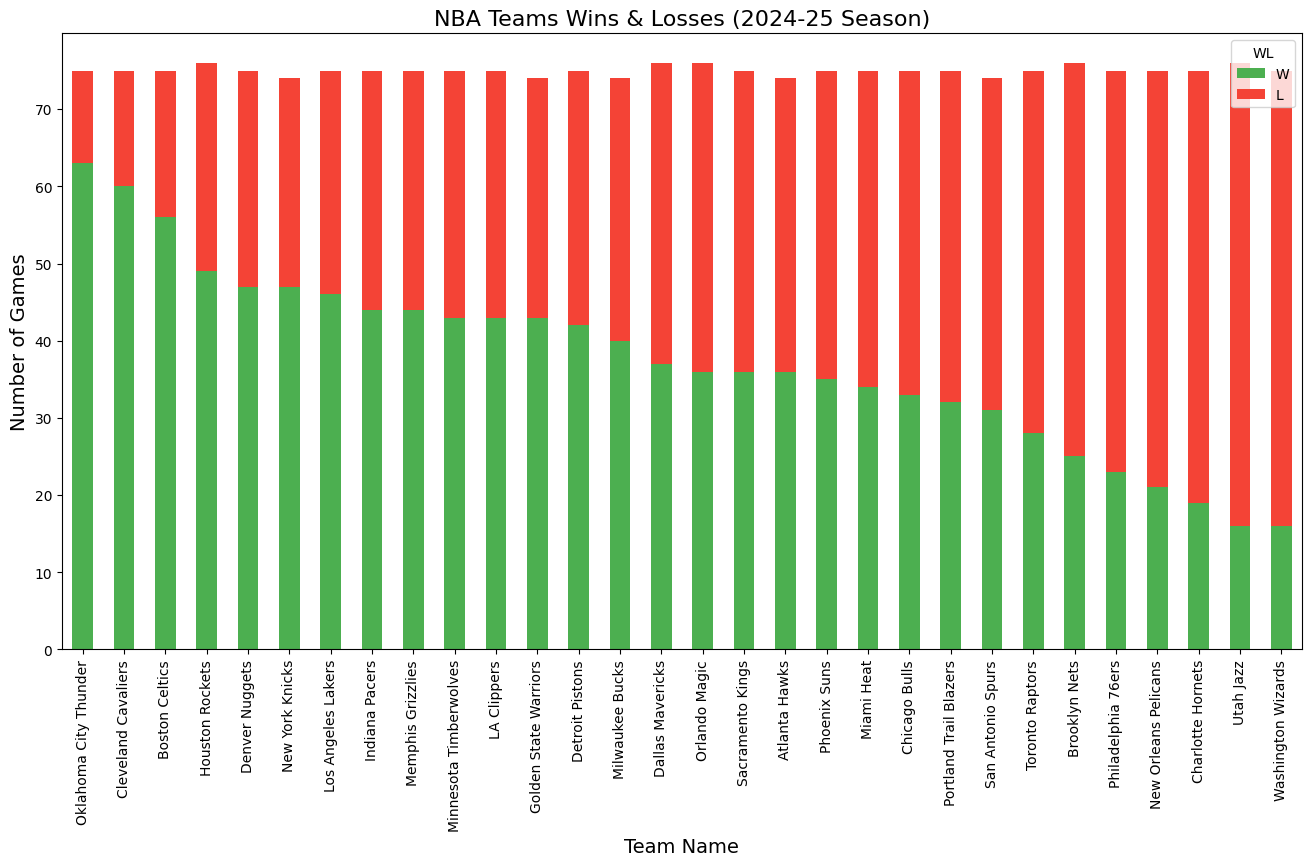

In [25]:
plt.figure(figsize=(16, 8))

# Plot Wins & Losses side by side for each team
team_results[['W', 'L']].sort_values(by='W', ascending=False).plot(kind='bar', stacked=True, figsize=(16, 8), color=['#4CAF50', '#F44336'])

plt.title('NBA Teams Wins & Losses (2024-25 Season)', fontsize=16)
plt.xlabel('Team Name', fontsize=14)
plt.ylabel('Number of Games', fontsize=14)
plt.xticks(rotation=90)
plt.show()

/var/folders/5n/r6b07v4s5cs3379jq_dtb8q00000gn/T/ipykernel_8135/1984061364.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_results.index, y=team_results['Win%'], palette='viridis')


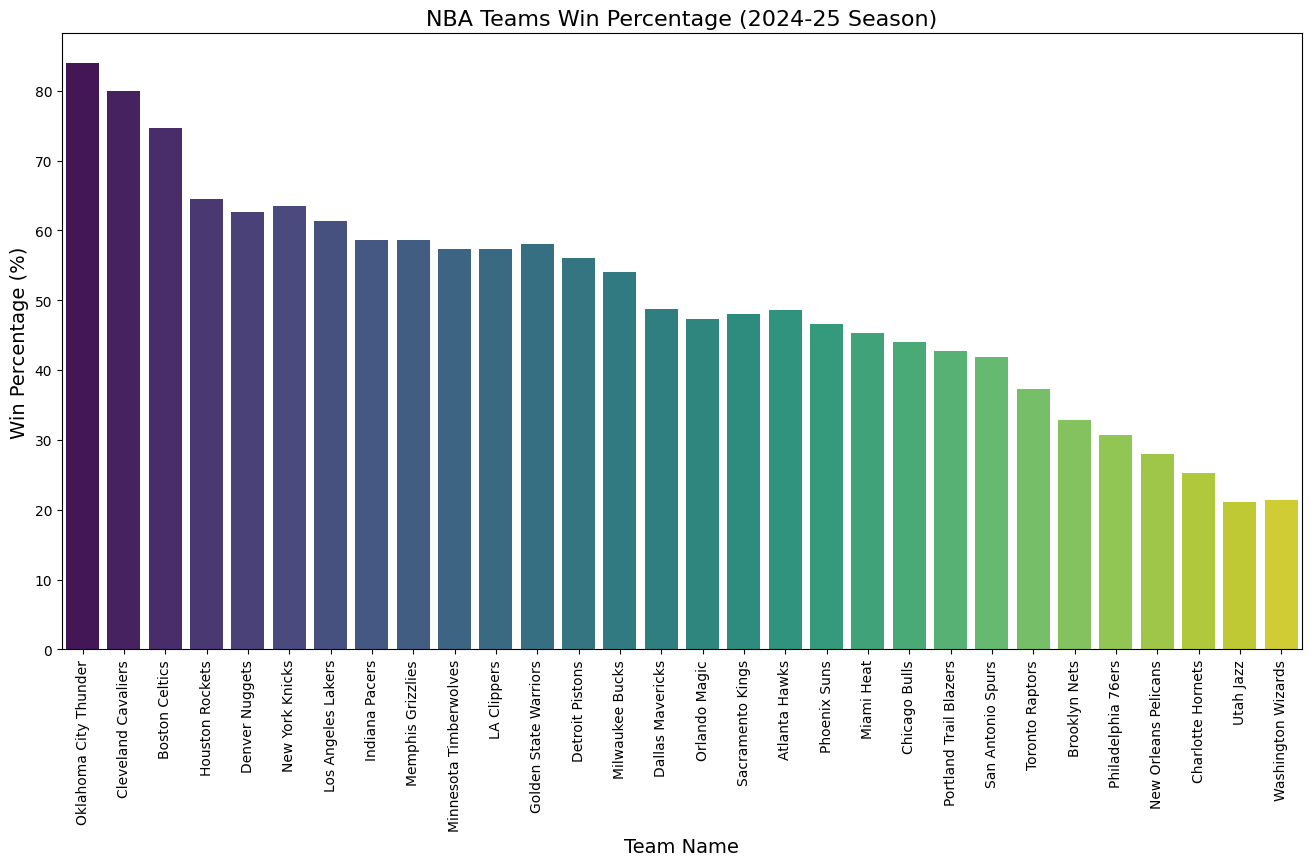

In [28]:
# Sort teams by Wins (W) from highest to lowest
team_results = team_results.sort_values(by='W', ascending=False)

plt.figure(figsize=(16, 8))
sns.barplot(x=team_results.index, y=team_results['Win%'], palette='viridis')
plt.xticks(rotation=90)
plt.title('NBA Teams Win Percentage (2024-25 Season)', fontsize=16)
plt.xlabel('Team Name', fontsize=14)
plt.ylabel('Win Percentage (%)', fontsize=14)
plt.show()


### OKC, CAV and CELTIC got the most winning percentage (>= 75), 10 next teams got the percentage of win around 50-75, the last half got under 50%, noticeable that Jazz and Washington Wizard got under 25% 

#### LET'S DO SOME COMPARISION BETWEEN WIN PERCENTAGE AND SOME OTHER STAT 

#### is it true that, team that got good 3pts shooters has higher chance to win? 

In [30]:
#lets compare the win percentage of the teams and the percentage of 3 point shots made
team_3p_pct = df_schedule.groupby('TEAM_NAME')['FG3_PCT'].mean() * 100  # Convert to percentage

# Combine both metrics into a single DataFrame
team_comparison = pd.concat([team_results['Win%'], team_3p_pct], axis=1)
team_comparison.columns = ['Win%', '3P%']

# Sort by Win Percentage
team_comparison_sorted = team_comparison.sort_values(by='Win%', ascending=False)

<Figure size 1600x800 with 0 Axes>

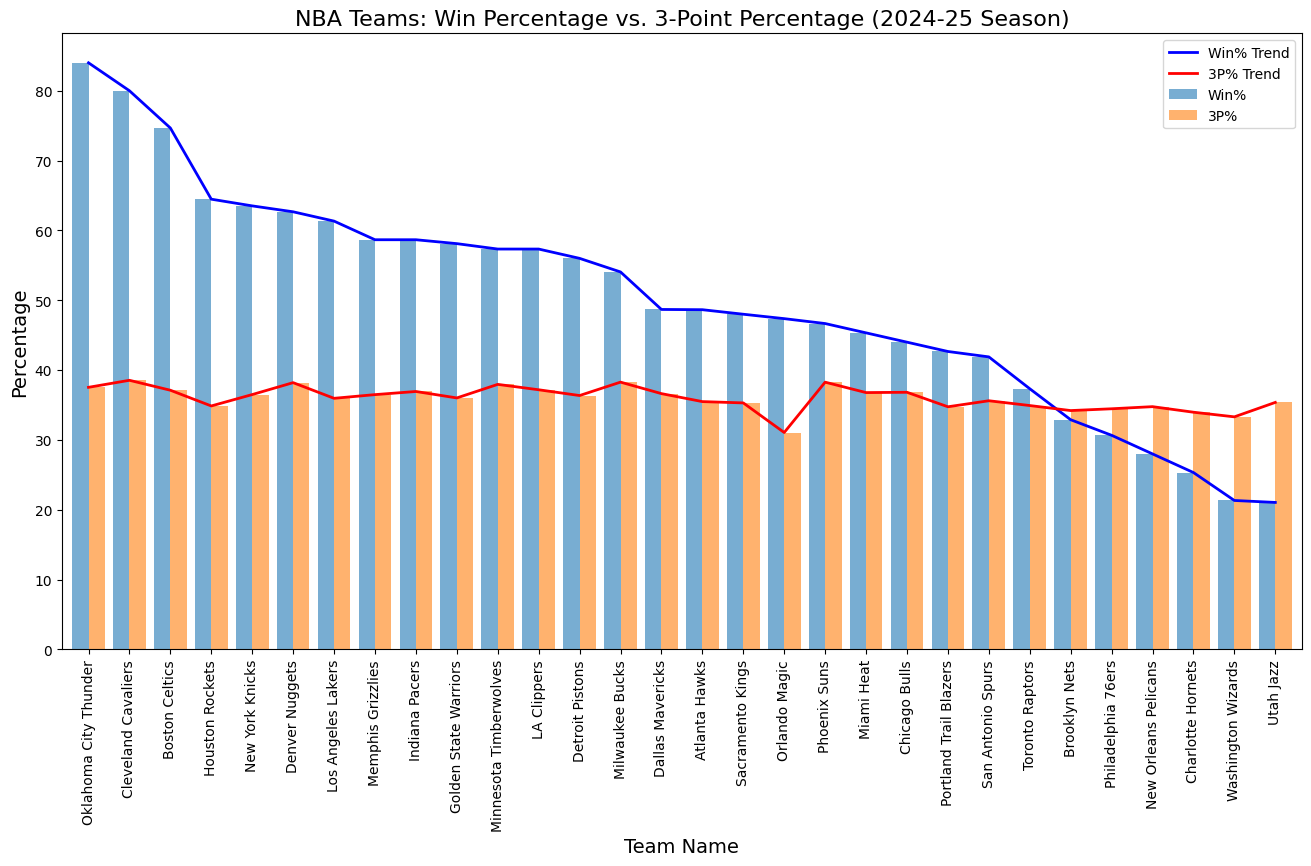

In [34]:

plt.figure(figsize=(16, 8))

# Plotting bar plots for 'Win%' and '3P%'
team_comparison_sorted[['Win%', '3P%']].plot(kind='bar', figsize=(16, 8), width=0.8, alpha=0.6)

# Adding trend lines for 'Win%' and '3P%'
sns.lineplot(x=np.arange(len(team_comparison_sorted)), y=team_comparison_sorted['Win%'], color='blue', label='Win% Trend', linewidth=2)
sns.lineplot(x=np.arange(len(team_comparison_sorted)), y=team_comparison_sorted['3P%'], color='red', label='3P% Trend', linewidth=2)

plt.title('NBA Teams: Win Percentage vs. 3-Point Percentage (2024-25 Season)', fontsize=16)
plt.xlabel('Team Name', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(ticks=np.arange(len(team_comparison_sorted)), labels=team_comparison_sorted.index, rotation=90)
plt.legend(loc='upper right')
plt.show()


#### AS OBSERVE, IT IS NOT TRUE THAT TEAMS GOT MORE ACCURACY OF 3PTS TENDS TO WIN

In [35]:
#how about overall shooting accuracy and win percentage
team_fg_pct = df_schedule.groupby('TEAM_NAME')['FG_PCT'].mean() * 100  # Convert
team_comparison = pd.concat([team_results['Win%'], team_fg_pct], axis=1)
team_comparison.columns = ['Win%', 'FG%']
team_comparison_fg = team_comparison.sort_values(by='Win%', ascending=False)



<Figure size 1600x800 with 0 Axes>

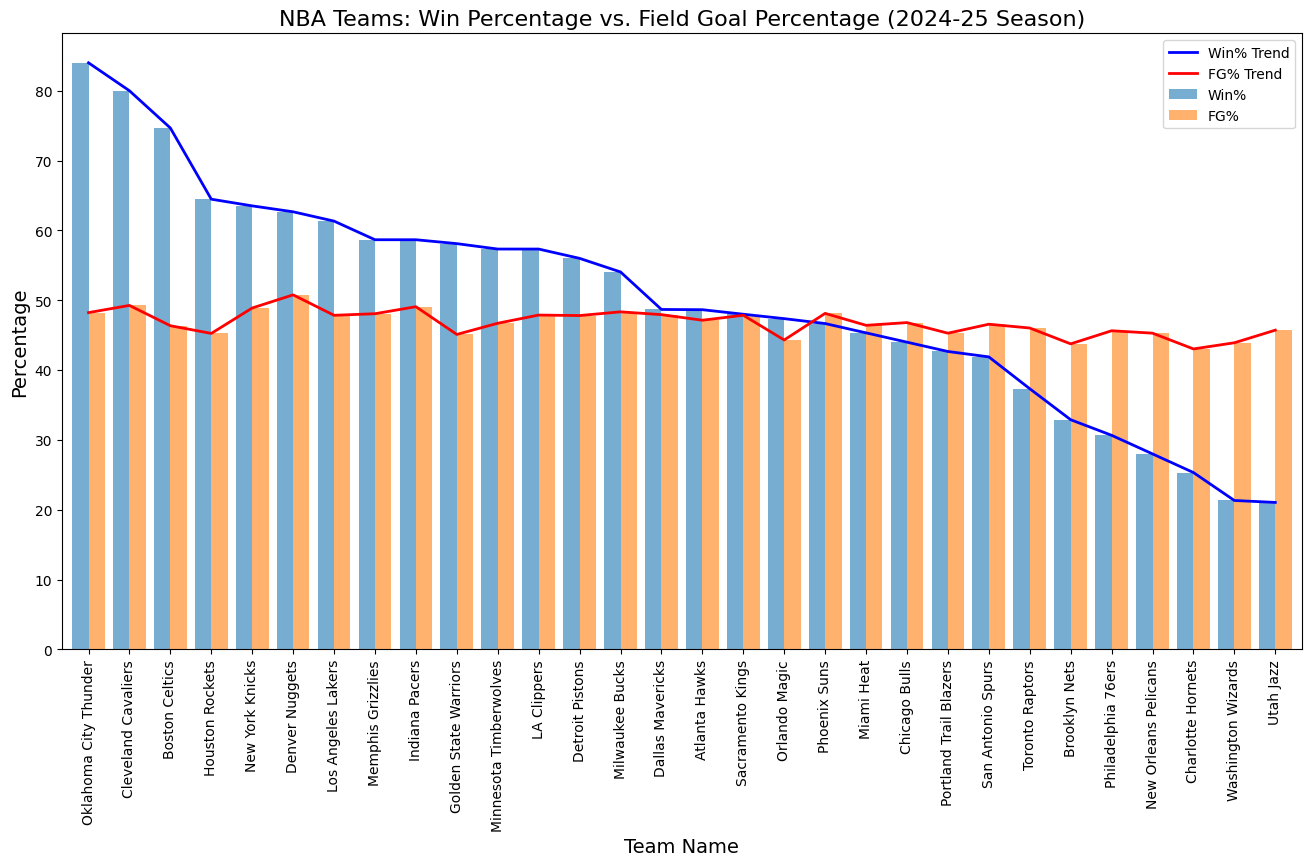

In [37]:

plt.figure(figsize=(16, 8))

team_comparison_fg[['Win%', 'FG%']].plot(kind='bar', figsize=(16, 8), width=0.8, alpha=0.6)

# Adding trend lines for 'Win%' and '3P%'
sns.lineplot(x=np.arange(len(team_comparison_fg)), y=team_comparison_fg['Win%'], color='blue', label='Win% Trend', linewidth=2)
sns.lineplot(x=np.arange(len(team_comparison_fg)), y=team_comparison_fg['FG%'], color='red', label='FG% Trend', linewidth=2)

plt.title('NBA Teams: Win Percentage vs. Field Goal Percentage (2024-25 Season)', fontsize=16)
plt.xlabel('Team Name', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(ticks=np.arange(len(team_comparison_sorted)), labels=team_comparison_fg.index, rotation=90)
plt.legend(loc='upper right')
plt.show()


### AGAIN, FIELD GOAL PERCENTAGE SAYS NOTHING TO THE WIN % (WE CAN SEE THAT THE QUALITY OF PLAYER IS QUITE NEAR FOR EVERY TEAM FOR OFFENSIVE STAT)

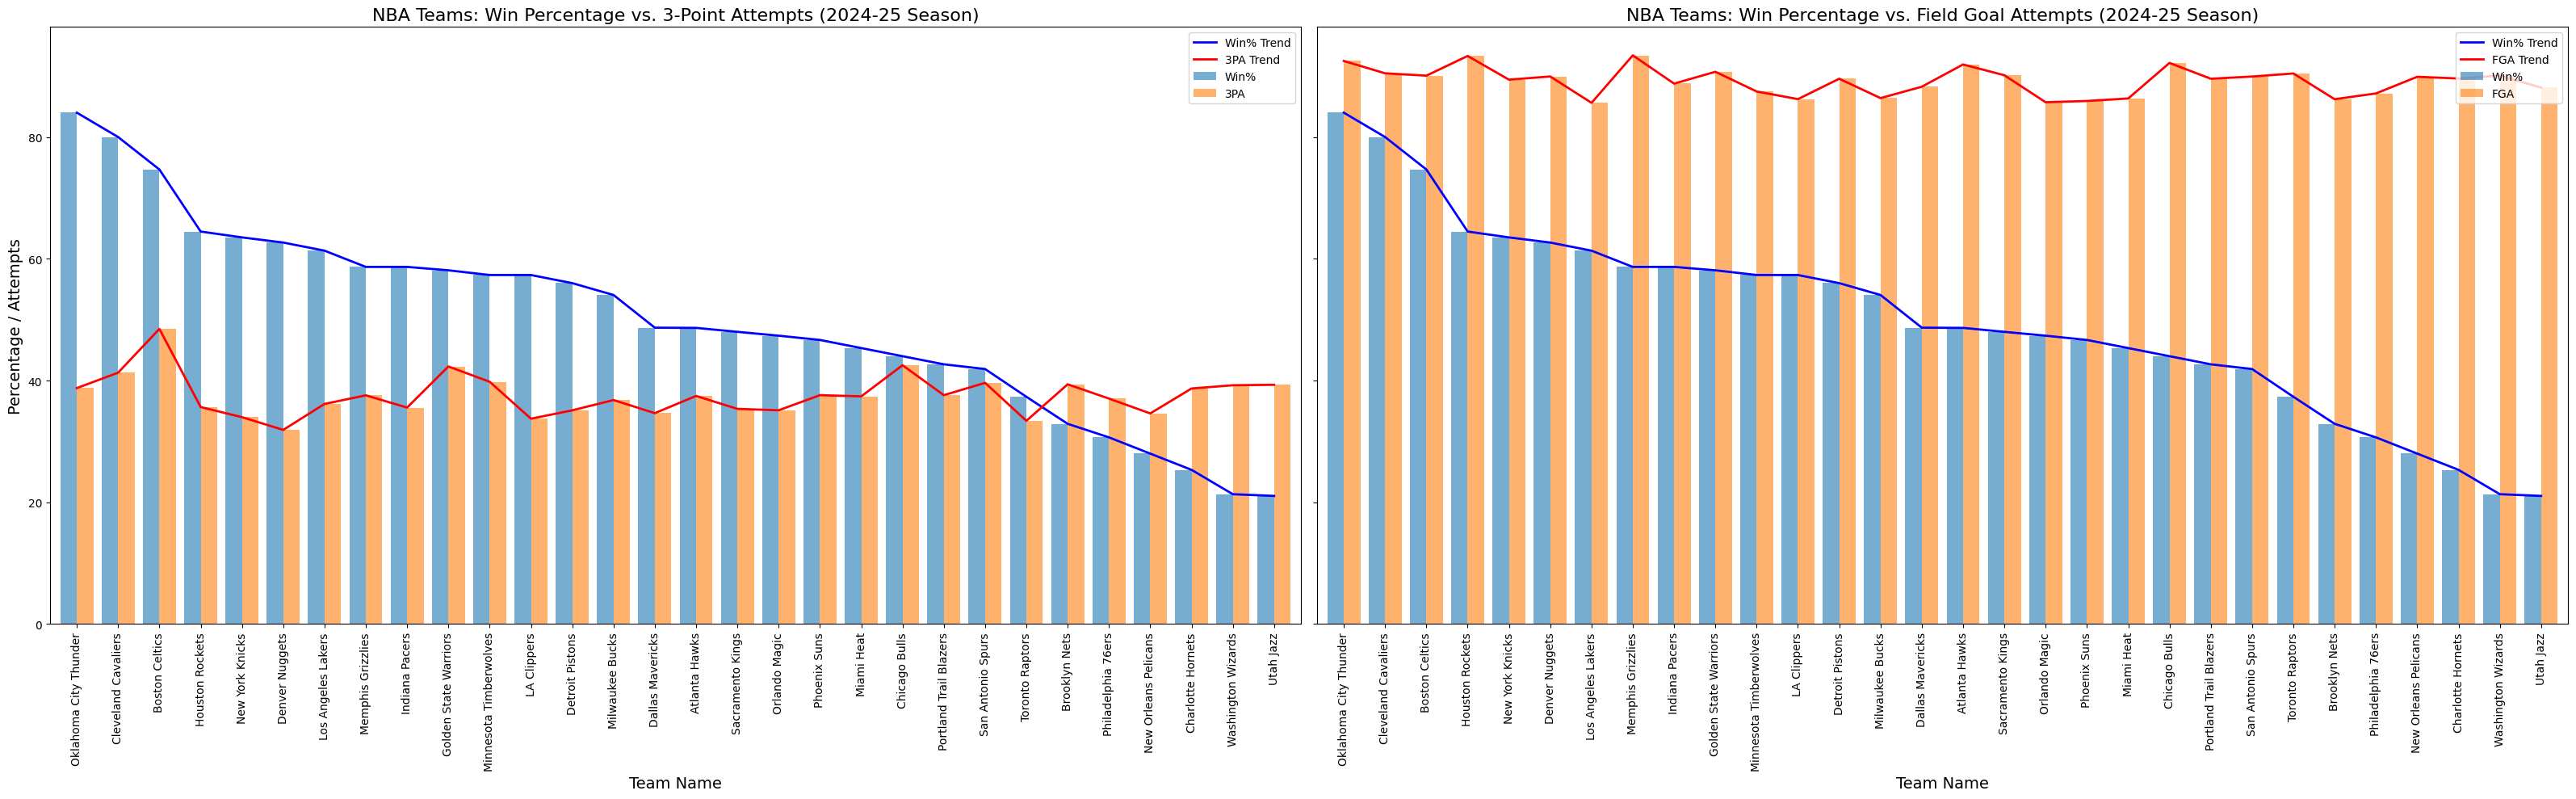

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate average 3PA and FGA for each team
team_3pa = df_schedule.groupby('TEAM_NAME')['FG3A'].mean()
team_fga = df_schedule.groupby('TEAM_NAME')['FGA'].mean()

# Combine Win%, 3PA, and FGA
team_comparison_3pa = pd.concat([team_results['Win%'], team_3pa], axis=1)
team_comparison_3pa.columns = ['Win%', '3PA']
team_comparison_3pa = team_comparison_3pa.sort_values(by='Win%', ascending=False)

team_comparison_fga = pd.concat([team_results['Win%'], team_fga], axis=1)
team_comparison_fga.columns = ['Win%', 'FGA']
team_comparison_fga = team_comparison_fga.sort_values(by='Win%', ascending=False)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(32, 10), sharey=True)

# Plot for 3PA
team_comparison_3pa[['Win%', '3PA']].plot(kind='bar', ax=axes[0], width=0.8, alpha=0.6)
sns.lineplot(x=np.arange(len(team_comparison_3pa)), y=team_comparison_3pa['Win%'], ax=axes[0], color='blue', label='Win% Trend', linewidth=2)
sns.lineplot(x=np.arange(len(team_comparison_3pa)), y=team_comparison_3pa['3PA'], ax=axes[0], color='red', label='3PA Trend', linewidth=2)

axes[0].set_title('NBA Teams: Win Percentage vs. 3-Point Attempts (2024-25 Season)', fontsize=16)
axes[0].set_xlabel('Team Name', fontsize=14)
axes[0].set_ylabel('Percentage / Attempts', fontsize=14)
axes[0].set_xticks(np.arange(len(team_comparison_3pa)))
axes[0].set_xticklabels(team_comparison_3pa.index, rotation=90)
axes[0].legend(loc='upper right')

# Plot for FGA
team_comparison_fga[['Win%', 'FGA']].plot(kind='bar', ax=axes[1], width=0.8, alpha=0.6)
sns.lineplot(x=np.arange(len(team_comparison_fga)), y=team_comparison_fga['Win%'], ax=axes[1], color='blue', label='Win% Trend', linewidth=2)
sns.lineplot(x=np.arange(len(team_comparison_fga)), y=team_comparison_fga['FGA'], ax=axes[1], color='red', label='FGA Trend', linewidth=2)

axes[1].set_title('NBA Teams: Win Percentage vs. Field Goal Attempts (2024-25 Season)', fontsize=16)
axes[1].set_xlabel('Team Name', fontsize=14)
axes[1].set_ylabel('Percentage / Attempts', fontsize=14)
axes[1].set_xticks(np.arange(len(team_comparison_fga)))
axes[1].set_xticklabels(team_comparison_fga.index, rotation=90)
axes[1].legend(loc='upper right')

plt.tight_layout()
plt.show()


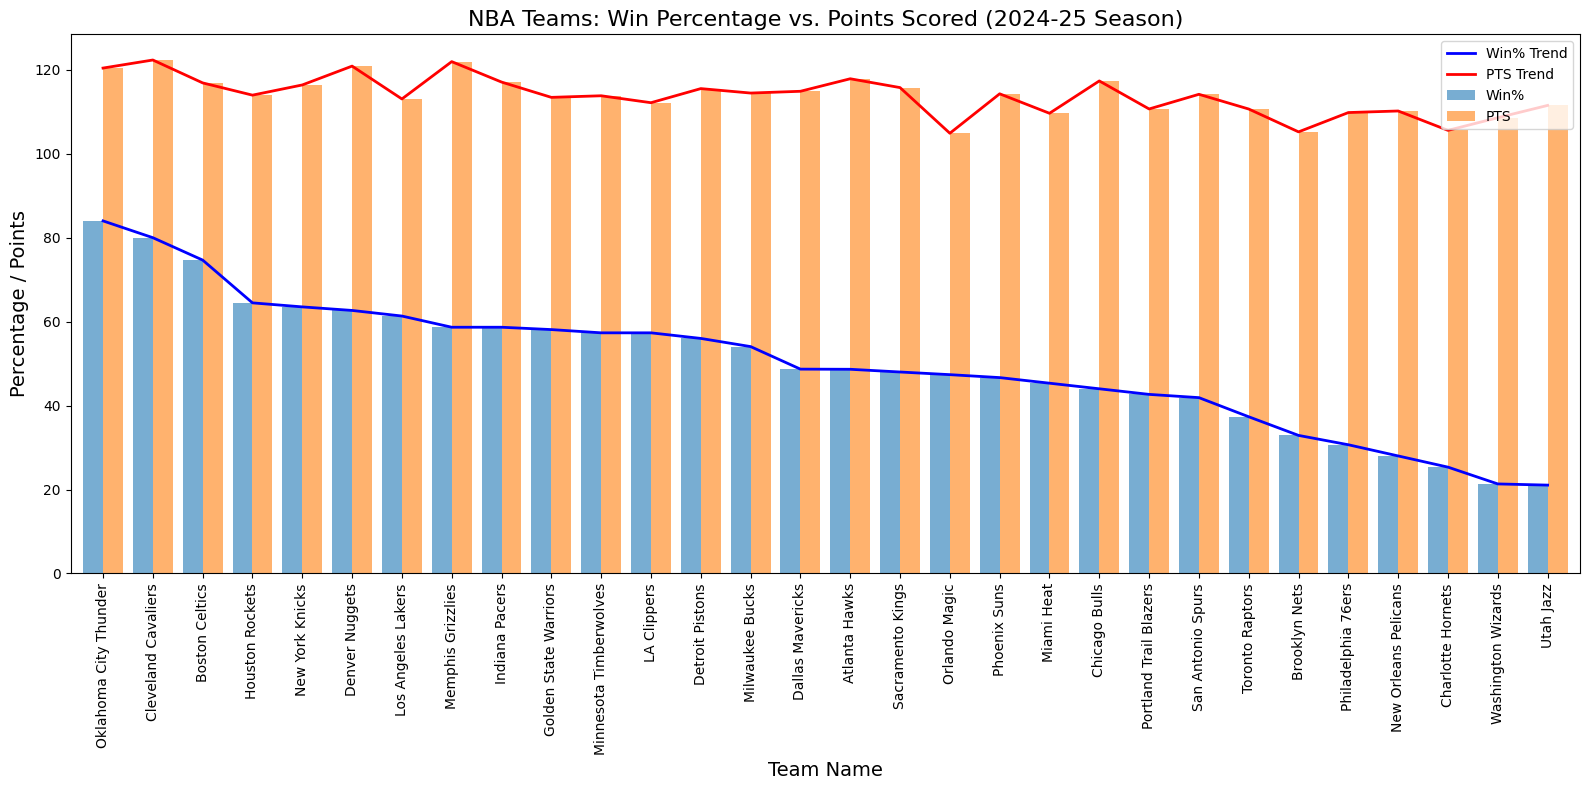

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate average PTS for each team
team_pts = df_schedule.groupby('TEAM_NAME')['PTS'].mean()

# Combine Win% and PTS
team_comparison_pts = pd.concat([team_results['Win%'], team_pts], axis=1)
team_comparison_pts.columns = ['Win%', 'PTS']
team_comparison_pts = team_comparison_pts.sort_values(by='Win%', ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot bar chart
team_comparison_pts[['Win%', 'PTS']].plot(kind='bar', ax=ax, width=0.8, alpha=0.6)

# Adding trend lines
sns.lineplot(x=np.arange(len(team_comparison_pts)), y=team_comparison_pts['Win%'], ax=ax, color='blue', label='Win% Trend', linewidth=2)
sns.lineplot(x=np.arange(len(team_comparison_pts)), y=team_comparison_pts['PTS'], ax=ax, color='red', label='PTS Trend', linewidth=2)

# Formatting the plot
ax.set_title('NBA Teams: Win Percentage vs. Points Scored (2024-25 Season)', fontsize=16)
ax.set_xlabel('Team Name', fontsize=14)
ax.set_ylabel('Percentage / Points', fontsize=14)
ax.set_xticks(np.arange(len(team_comparison_pts)))
ax.set_xticklabels(team_comparison_pts.index, rotation=90)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()


### CONCLUSTION: OFENSIVE STAT SAYS NOTHING ABOUT IF A TEAM HAS HIGH PERCENTAGE OF WIN
📌 Why PTS May Not Correlate Well With Win%:
Pace of Play: Teams that play at a faster pace will generally score more points but may not be more efficient or successful.

Offensive Efficiency: Just scoring a lot of points doesn’t guarantee wins if the team also allows a lot of points.

Defensive Performance: Teams with strong defenses can win games even if their scoring is average.

Consistency: High variance in scoring (good games vs. bad games) may make PTS a poor predictor of win percentage.

Close Games: Winning close games may depend more on clutch performance or defense than on overall scoring ability.



### LETS COMPARE DEFENSIVE STAT AND WIN PERCENTAGE

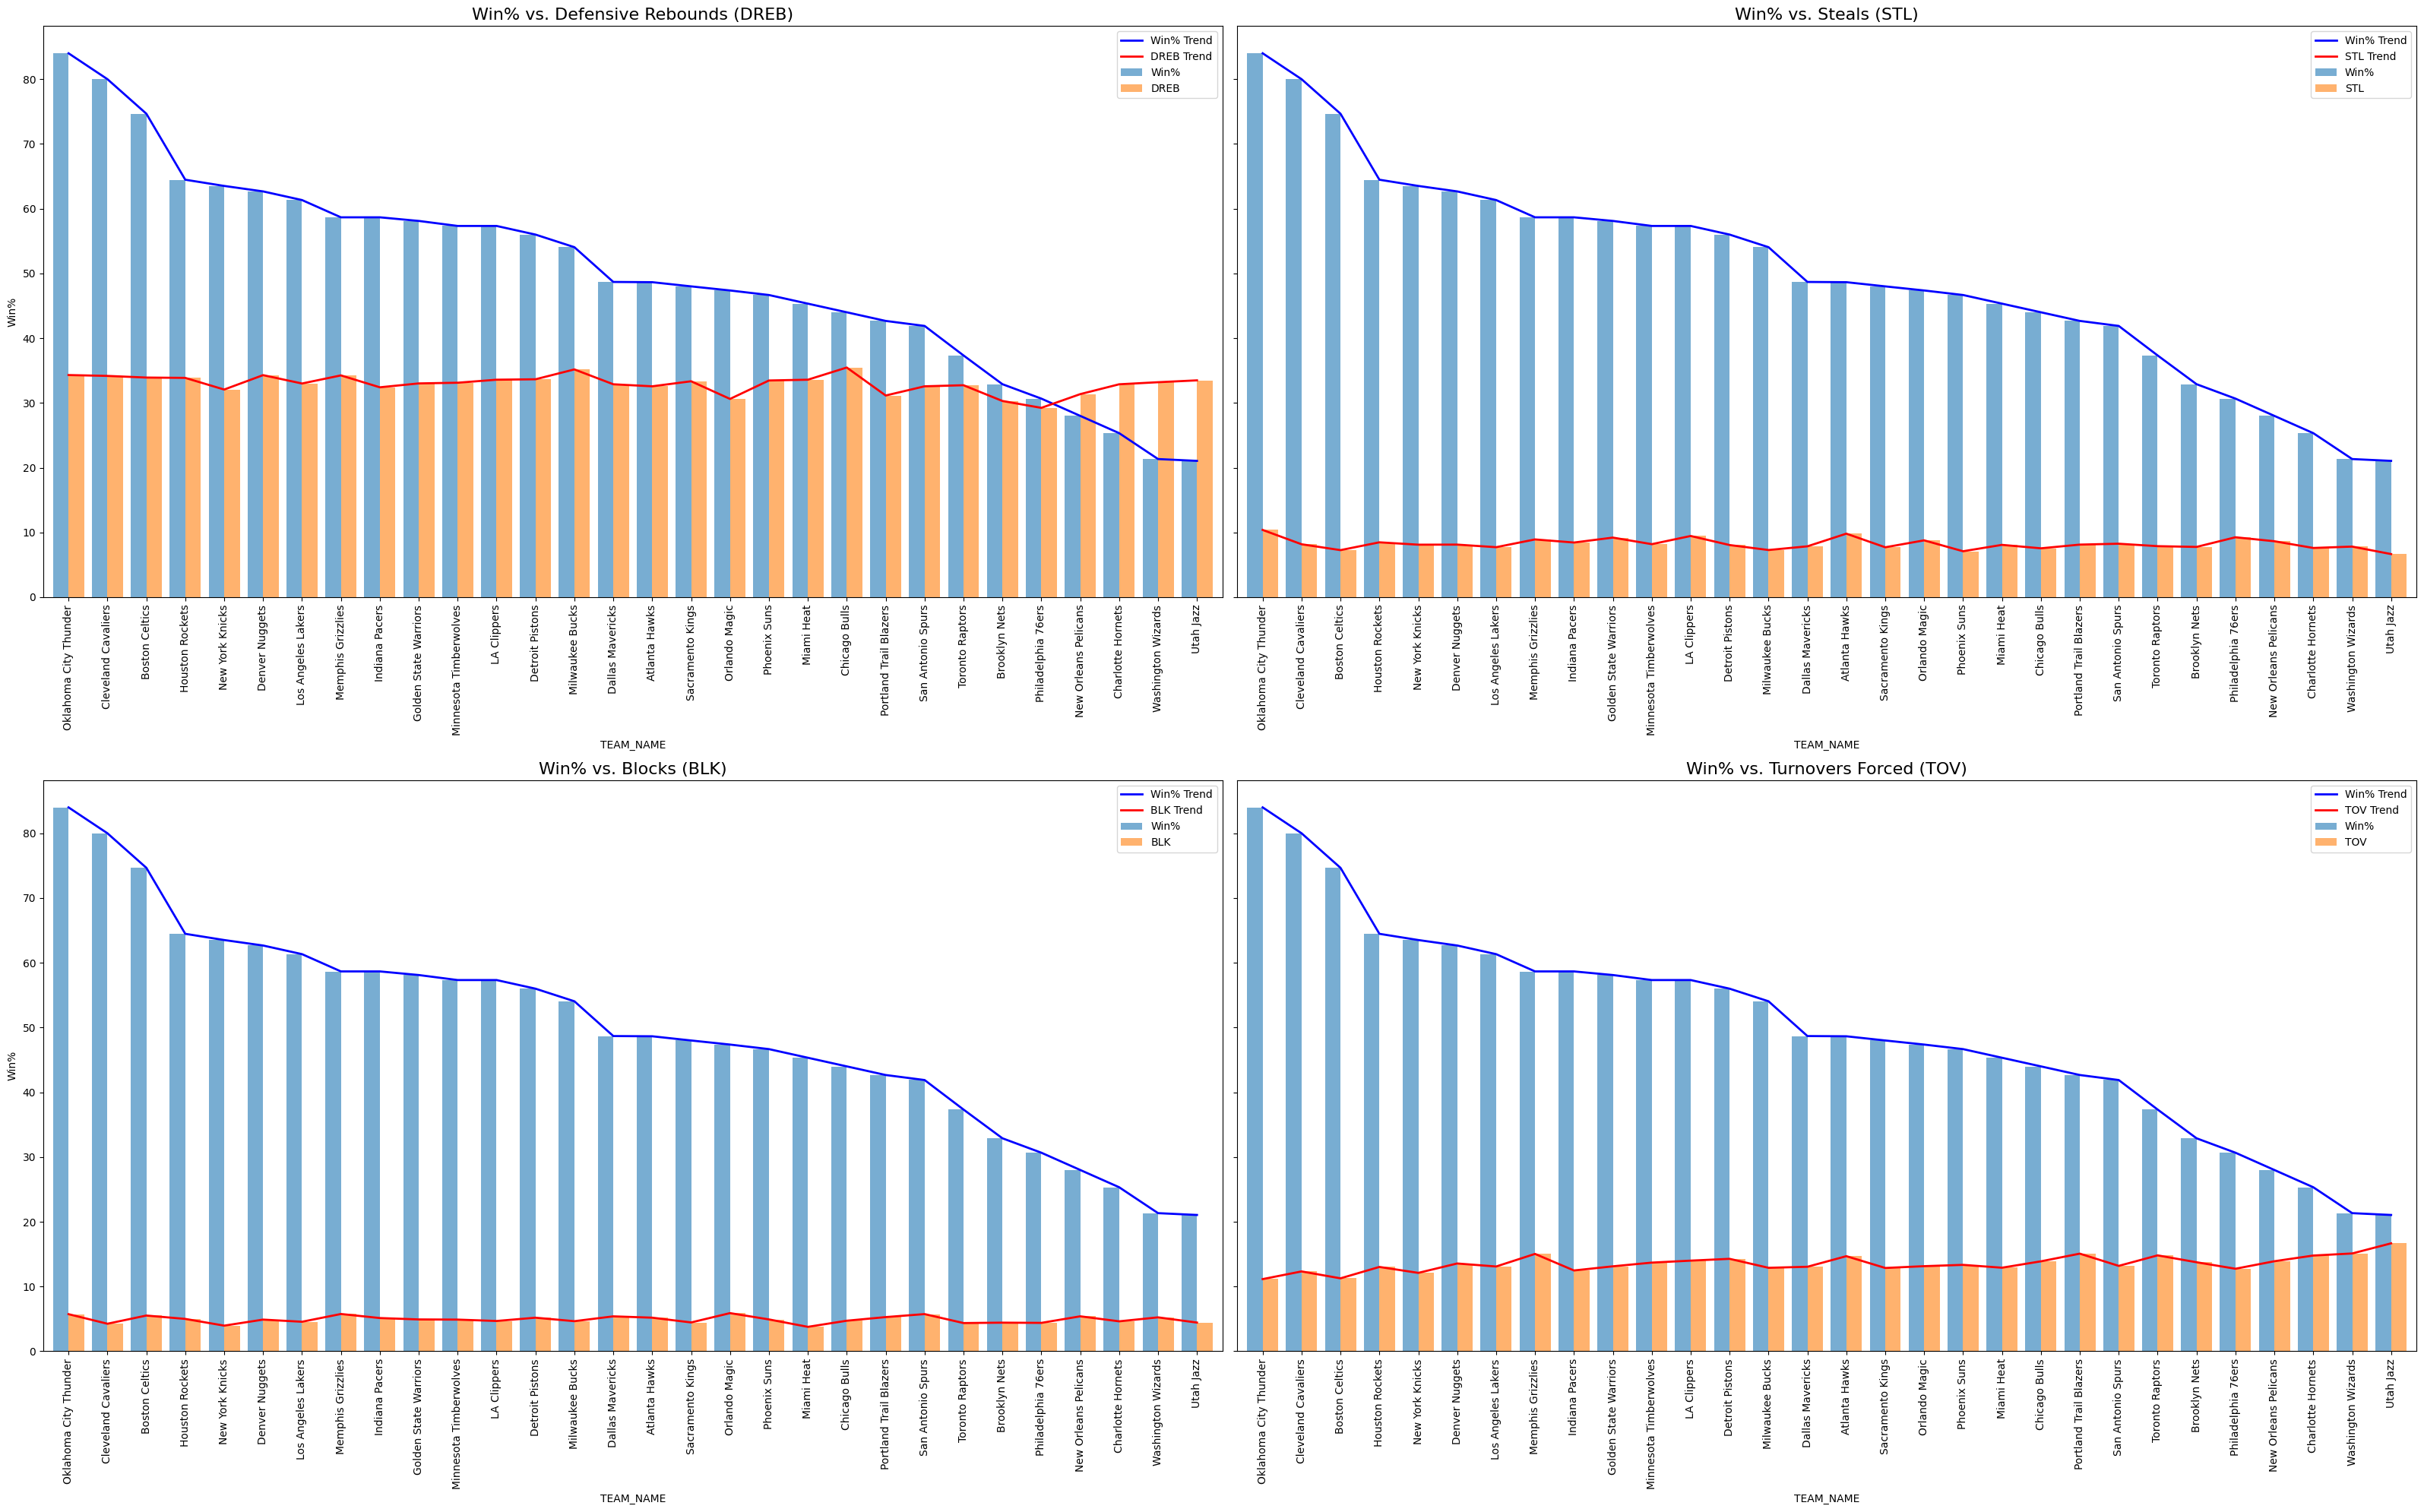

In [41]:
# Calculate average Defensive Metrics for each team
team_dreb = df_schedule.groupby('TEAM_NAME')['DREB'].mean()
team_stl = df_schedule.groupby('TEAM_NAME')['STL'].mean()
team_blk = df_schedule.groupby('TEAM_NAME')['BLK'].mean()
team_tov = df_schedule.groupby('TEAM_NAME')['TOV'].mean()

# Combine Win% with each defensive metric
team_comparison_dreb = pd.concat([team_results['Win%'], team_dreb], axis=1).sort_values(by='Win%', ascending=False)
team_comparison_dreb.columns = ['Win%', 'DREB']

team_comparison_stl = pd.concat([team_results['Win%'], team_stl], axis=1).sort_values(by='Win%', ascending=False)
team_comparison_stl.columns = ['Win%', 'STL']

team_comparison_blk = pd.concat([team_results['Win%'], team_blk], axis=1).sort_values(by='Win%', ascending=False)
team_comparison_blk.columns = ['Win%', 'BLK']

team_comparison_tov = pd.concat([team_results['Win%'], team_tov], axis=1).sort_values(by='Win%', ascending=False)
team_comparison_tov.columns = ['Win%', 'TOV']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(32, 20), sharey=True)

# Plot for DREB
team_comparison_dreb[['Win%', 'DREB']].plot(kind='bar', ax=axes[0, 0], width=0.8, alpha=0.6)
sns.lineplot(x=np.arange(len(team_comparison_dreb)), y=team_comparison_dreb['Win%'], ax=axes[0, 0], color='blue', label='Win% Trend', linewidth=2)
sns.lineplot(x=np.arange(len(team_comparison_dreb)), y=team_comparison_dreb['DREB'], ax=axes[0, 0], color='red', label='DREB Trend', linewidth=2)
axes[0, 0].set_title('Win% vs. Defensive Rebounds (DREB)', fontsize=16)
axes[0, 0].set_xticks(np.arange(len(team_comparison_dreb)))
axes[0, 0].set_xticklabels(team_comparison_dreb.index, rotation=90)
axes[0, 0].legend(loc='upper right')

# Plot for STL
team_comparison_stl[['Win%', 'STL']].plot(kind='bar', ax=axes[0, 1], width=0.8, alpha=0.6)
sns.lineplot(x=np.arange(len(team_comparison_stl)), y=team_comparison_stl['Win%'], ax=axes[0, 1], color='blue', label='Win% Trend', linewidth=2)
sns.lineplot(x=np.arange(len(team_comparison_stl)), y=team_comparison_stl['STL'], ax=axes[0, 1], color='red', label='STL Trend', linewidth=2)
axes[0, 1].set_title('Win% vs. Steals (STL)', fontsize=16)
axes[0, 1].set_xticks(np.arange(len(team_comparison_stl)))
axes[0, 1].set_xticklabels(team_comparison_stl.index, rotation=90)
axes[0, 1].legend(loc='upper right')

# Plot for BLK
team_comparison_blk[['Win%', 'BLK']].plot(kind='bar', ax=axes[1, 0], width=0.8, alpha=0.6)
sns.lineplot(x=np.arange(len(team_comparison_blk)), y=team_comparison_blk['Win%'], ax=axes[1, 0], color='blue', label='Win% Trend', linewidth=2)
sns.lineplot(x=np.arange(len(team_comparison_blk)), y=team_comparison_blk['BLK'], ax=axes[1, 0], color='red', label='BLK Trend', linewidth=2)
axes[1, 0].set_title('Win% vs. Blocks (BLK)', fontsize=16)
axes[1, 0].set_xticks(np.arange(len(team_comparison_blk)))
axes[1, 0].set_xticklabels(team_comparison_blk.index, rotation=90)
axes[1, 0].legend(loc='upper right')

# Plot for TOV
team_comparison_tov[['Win%', 'TOV']].plot(kind='bar', ax=axes[1, 1], width=0.8, alpha=0.6)
sns.lineplot(x=np.arange(len(team_comparison_tov)), y=team_comparison_tov['Win%'], ax=axes[1, 1], color='blue', label='Win% Trend', linewidth=2)
sns.lineplot(x=np.arange(len(team_comparison_tov)), y=team_comparison_tov['TOV'], ax=axes[1, 1], color='red', label='TOV Trend', linewidth=2)
axes[1, 1].set_title('Win% vs. Turnovers Forced (TOV)', fontsize=16)
axes[1, 1].set_xticks(np.arange(len(team_comparison_tov)))
axes[1, 1].set_xticklabels(team_comparison_tov.index, rotation=90)
axes[1, 1].legend(loc='upper right')

plt.tight_layout()
plt.show()

DREB (Defensive Rebounds):

It has some variation, but the trend line is mostly flat compared to Win%.

Teams with high Win% don't necessarily have high DREB.

STL (Steals):

The trend is generally low across all teams.

Steals don't appear to correlate strongly with Win%.

BLK (Blocks):

The trend is also quite flat.

Blocks are a rare event in games, so they may not have a large impact on overall team success.

TOV (Turnovers Forced):

Similar to STL, this trend is flat.

Forcing turnovers might be important but doesn’t seem directly related to Win%.

In [46]:
# Filter home and away games
home_games = df_schedule[df_schedule['MATCHUP'].str.contains('vs.')]
away_games = df_schedule[df_schedule['MATCHUP'].str.contains('@')]

# Calculate total home games and home wins for each team
home_results = home_games.groupby(['TEAM_NAME', 'WL']).size().unstack(fill_value=0)
home_results['Total Home Games'] = home_results['W'] + home_results['L']
home_results['Home Win%'] = (home_results['W'] / home_results['Total Home Games']) * 100

# Calculate total away games and away wins for each team
away_results = away_games.groupby(['TEAM_NAME', 'WL']).size().unstack(fill_value=0)
away_results['Total Away Games'] = away_results['W'] + away_results['L']
away_results['Away Win%'] = (away_results['W'] / away_results['Total Away Games']) * 100

# Merge Overall Win%, Home Win%, and Away Win%
team_comparison = pd.concat([team_results['Win%'], home_results['Home Win%'], away_results['Away Win%']], axis=1)
team_comparison = team_comparison.sort_values(by='Win%', ascending=False)

# Display the merged data
print(team_comparison)


                             Win%  Home Win%  Away Win%
TEAM_NAME                                              
Oklahoma City Thunder   84.000000  86.842105  81.081081
Cleveland Cavaliers     80.000000  86.486486  73.684211
Boston Celtics          74.666667  66.666667  82.051282
Houston Rockets         64.473684  71.052632  57.894737
New York Knicks         63.513514  67.567568  59.459459
Denver Nuggets          62.666667  67.567568  57.894737
Los Angeles Lakers      61.333333  76.315789  45.945946
Memphis Grizzlies       58.666667  65.789474  51.351351
Indiana Pacers          58.666667  71.428571  47.500000
Golden State Warriors   58.108108  62.162162  54.054054
Minnesota Timberwolves  57.333333  58.974359  55.555556
LA Clippers             57.333333  69.444444  46.153846
Detroit Pistons         56.000000  56.756757  55.263158
Milwaukee Bucks         54.054054  62.162162  45.945946
Dallas Mavericks        48.684211  54.054054  43.589744
Atlanta Hawks           48.648649  52.777778  44

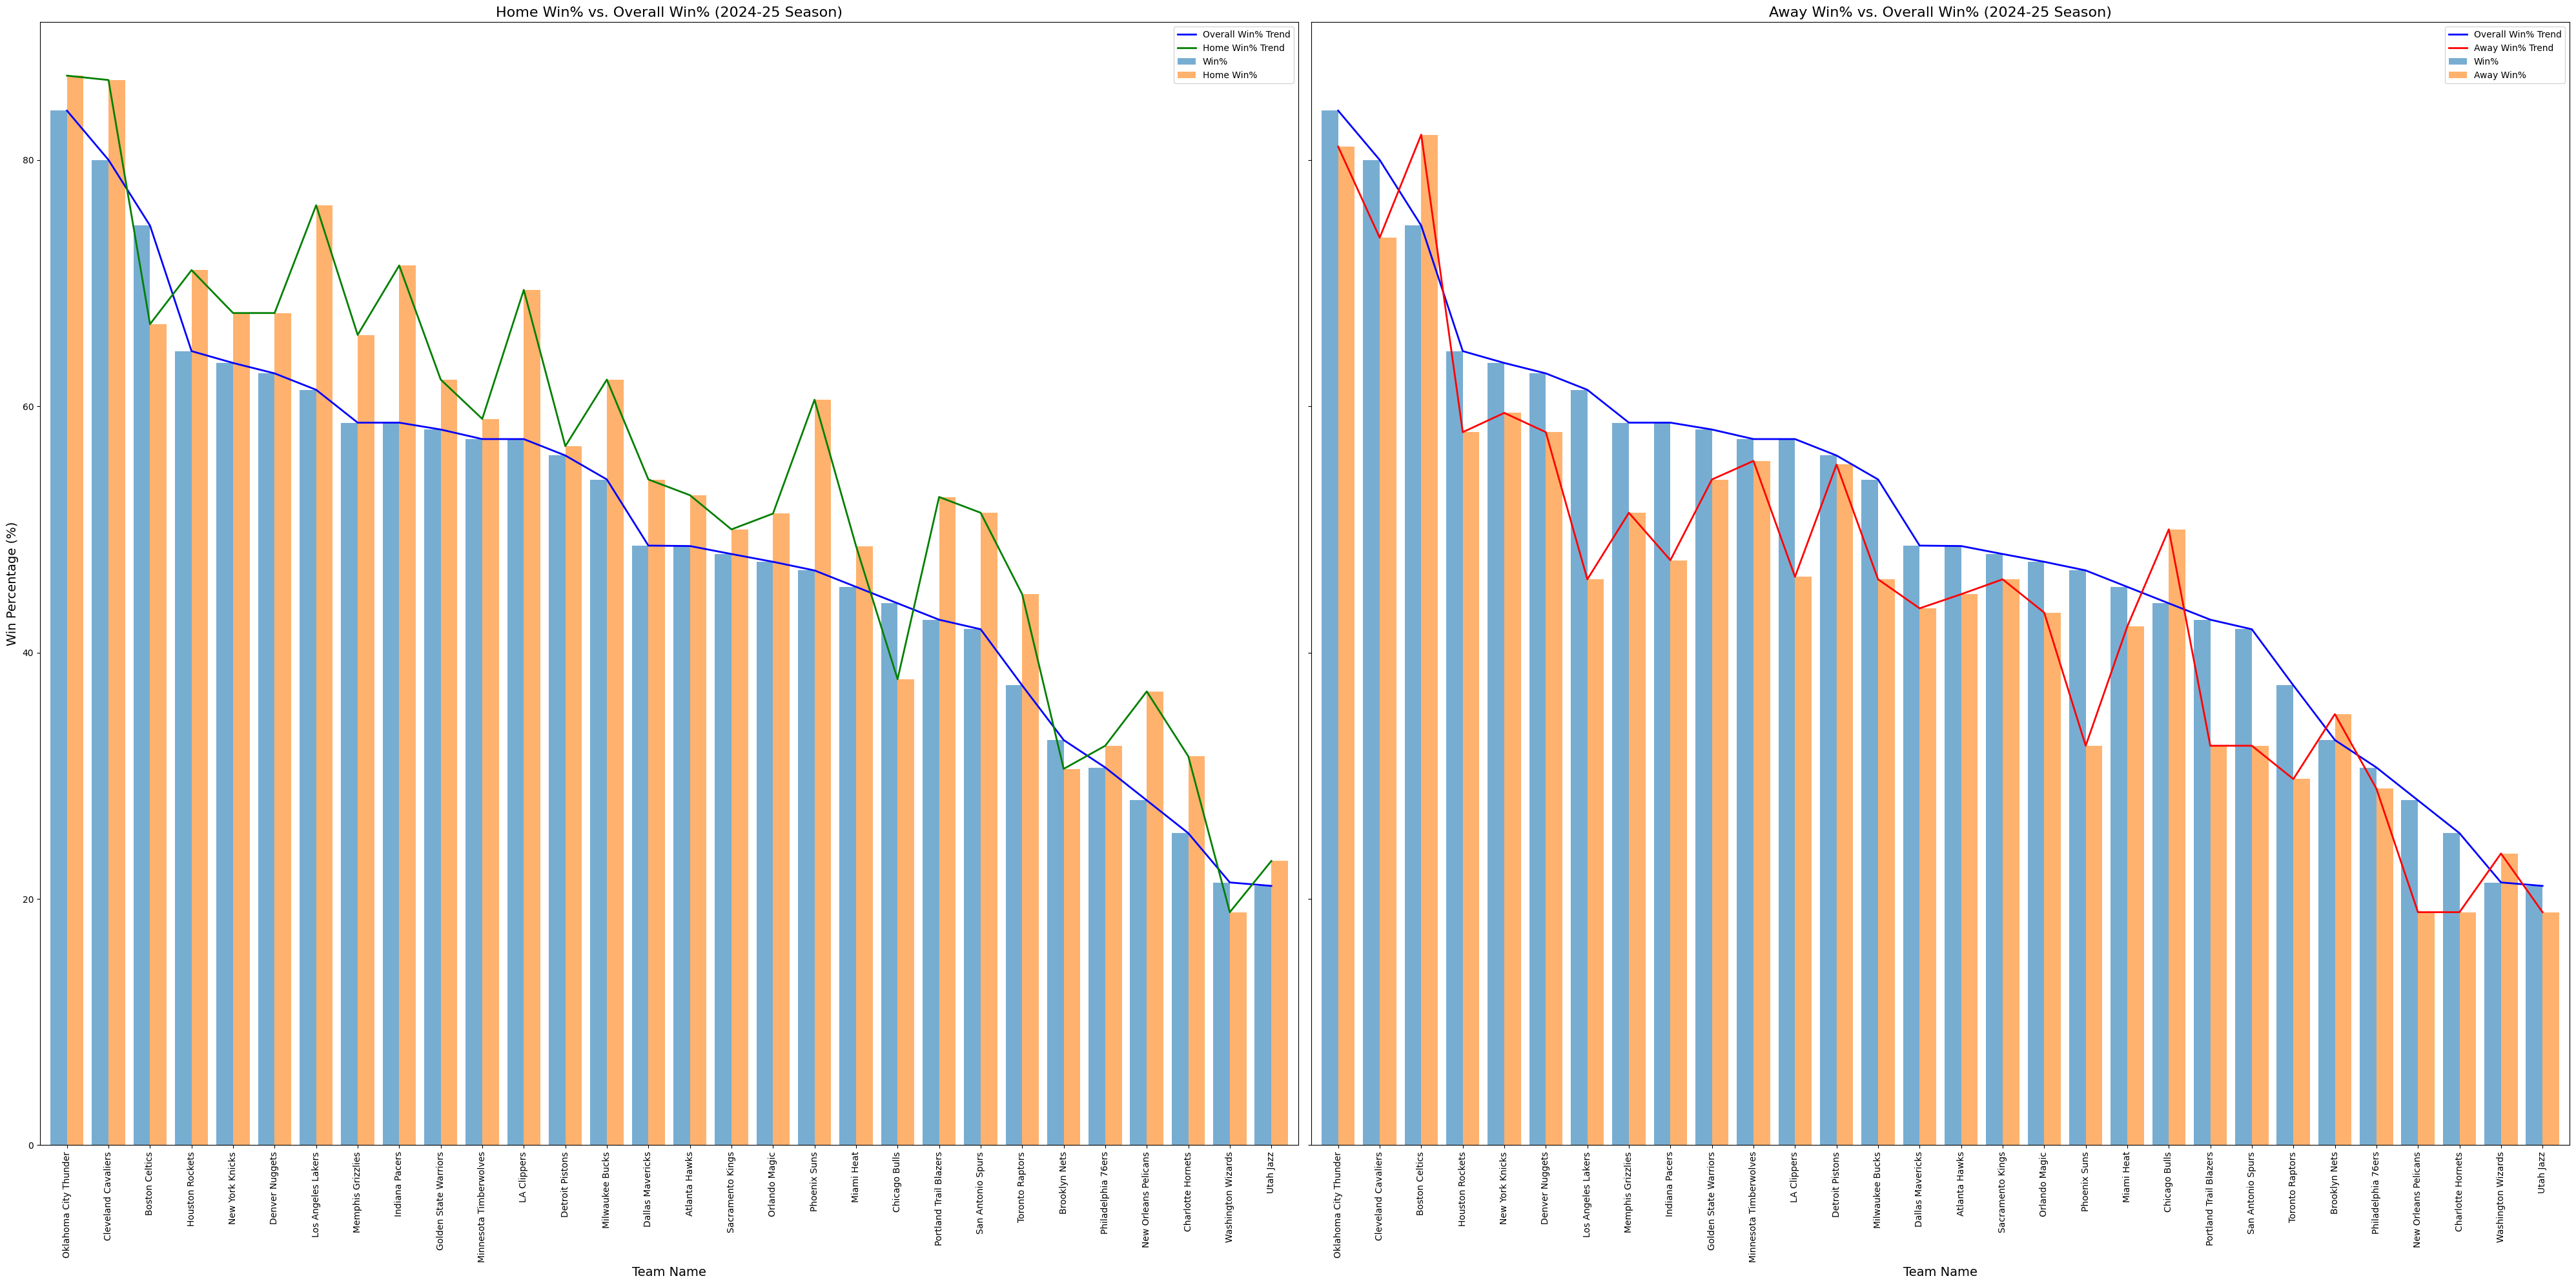

In [48]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(40, 20), sharey=True)

# Plot Home Win% vs Overall Win%
team_comparison[['Win%', 'Home Win%']].plot(kind='bar', ax=axes[0], width=0.8, alpha=0.6)
sns.lineplot(x=np.arange(len(team_comparison)), y=team_comparison['Win%'], ax=axes[0], color='blue', label='Overall Win% Trend', linewidth=2)
sns.lineplot(x=np.arange(len(team_comparison)), y=team_comparison['Home Win%'], ax=axes[0], color='green', label='Home Win% Trend', linewidth=2)

axes[0].set_title('Home Win% vs. Overall Win% (2024-25 Season)', fontsize=16)
axes[0].set_xlabel('Team Name', fontsize=14)
axes[0].set_ylabel('Win Percentage (%)', fontsize=14)
axes[0].set_xticks(np.arange(len(team_comparison)))
axes[0].set_xticklabels(team_comparison.index, rotation=90)
axes[0].legend(loc='upper right')

# Plot Away Win% vs Overall Win%
team_comparison[['Win%', 'Away Win%']].plot(kind='bar', ax=axes[1], width=0.8, alpha=0.6)
sns.lineplot(x=np.arange(len(team_comparison)), y=team_comparison['Win%'], ax=axes[1], color='blue', label='Overall Win% Trend', linewidth=2)
sns.lineplot(x=np.arange(len(team_comparison)), y=team_comparison['Away Win%'], ax=axes[1], color='red', label='Away Win% Trend', linewidth=2)

axes[1].set_title('Away Win% vs. Overall Win% (2024-25 Season)', fontsize=16)
axes[1].set_xlabel('Team Name', fontsize=14)
axes[1].set_ylabel('Win Percentage (%)', fontsize=14)
axes[1].set_xticks(np.arange(len(team_comparison)))
axes[1].set_xticklabels(team_comparison.index, rotation=90)
axes[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

Home Win% vs. Overall Win% (Left Plot):

Teams with high Overall Win% generally have even higher Home Win%.

Noticeable peaks in Home Win% suggest that certain teams are particularly strong at home (e.g., Oklahoma City Thunder, Cleveland Cavaliers).

The green trend line (Home Win%) is generally above the blue line (Overall Win%).

Away Win% vs. Overall Win% (Right Plot):

Teams with high Overall Win% tend to maintain solid Away Win%, but it's typically lower than their Home Win%.

Noticeable dips in the red trend line (Away Win%) indicate teams that struggle more on the road.

The red trend line is mostly below the blue line (Overall Win%).

Some teams in the middle for example LA Lakers or LA CLiper got high %win at home but low at away, and in contrast is Boston Celtic (good at away but bad at home) (good and bad here is comparing with overall win and the other (away vs home) not comparing to other team)



In [49]:
# Calculate the difference between Home Win% and Away Win%
team_comparison['Home vs. Away Difference'] = team_comparison['Home Win%'] - team_comparison['Away Win%']

# Rank teams by the difference between Home Win% and Away Win%
ranked_teams = team_comparison.sort_values(by='Home vs. Away Difference', ascending=False)

# Display the ranked teams
print(ranked_teams[['Home Win%', 'Away Win%', 'Home vs. Away Difference']])


                        Home Win%  Away Win%  Home vs. Away Difference
TEAM_NAME                                                             
Los Angeles Lakers      76.315789  45.945946                 30.369844
Phoenix Suns            60.526316  32.432432                 28.093883
Indiana Pacers          71.428571  47.500000                 23.928571
LA Clippers             69.444444  46.153846                 23.290598
Portland Trail Blazers  52.631579  32.432432                 20.199147
San Antonio Spurs       51.351351  32.432432                 18.918919
New Orleans Pelicans    36.842105  18.918919                 17.923186
Milwaukee Bucks         62.162162  45.945946                 16.216216
Toronto Raptors         44.736842  29.729730                 15.007112
Memphis Grizzlies       65.789474  51.351351                 14.438122
Houston Rockets         71.052632  57.894737                 13.157895
Cleveland Cavaliers     86.486486  73.684211                 12.802276
Charlo

/var/folders/5n/r6b07v4s5cs3379jq_dtb8q00000gn/T/ipykernel_8135/1282995621.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ranked_teams.index, y=ranked_teams['Home vs. Away Difference'], palette='viridis')


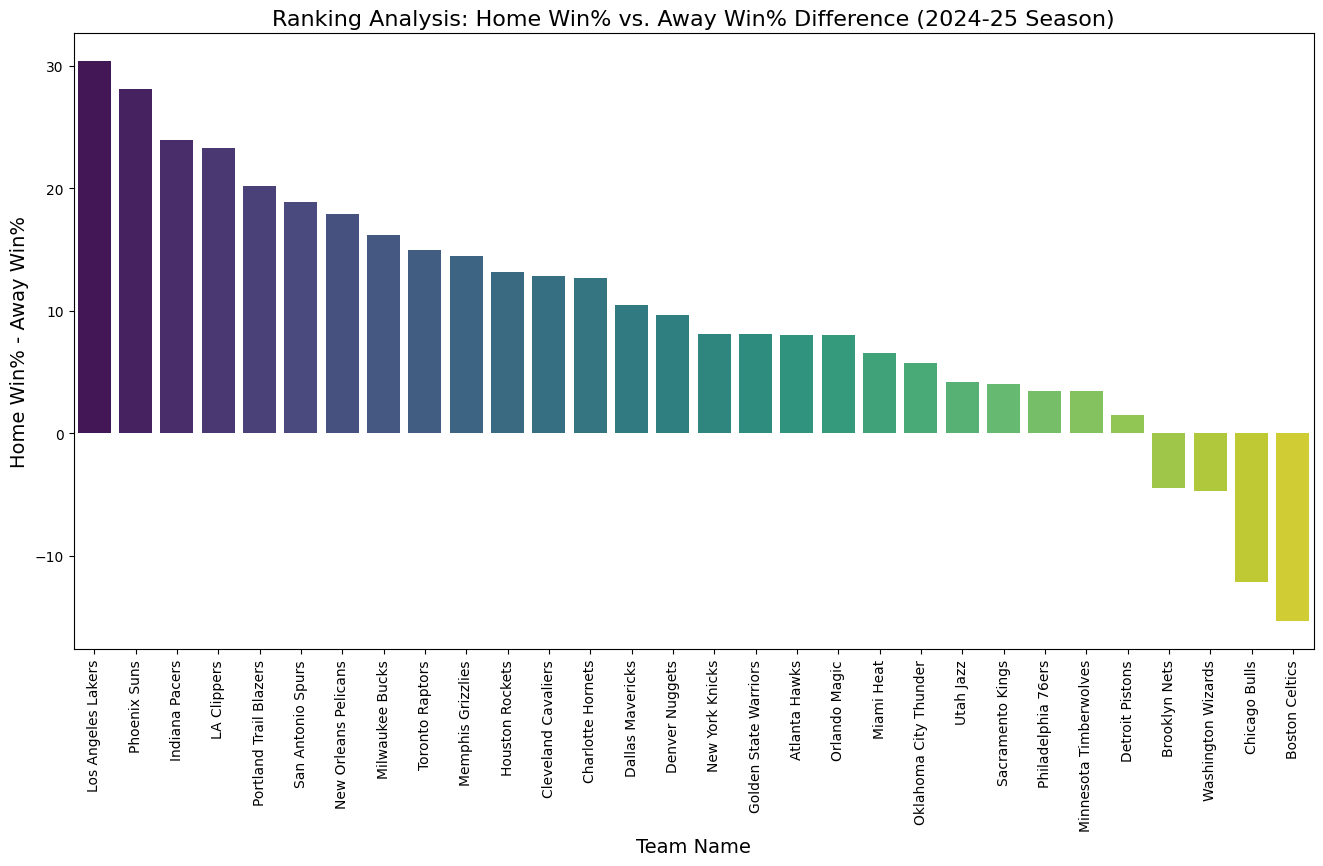

In [50]:
plt.figure(figsize=(16, 8))

# Plot bar chart of Home vs. Away Difference
sns.barplot(x=ranked_teams.index, y=ranked_teams['Home vs. Away Difference'], palette='viridis')

plt.title('Ranking Analysis: Home Win% vs. Away Win% Difference (2024-25 Season)', fontsize=16)
plt.xlabel('Team Name', fontsize=14)
plt.ylabel('Home Win% - Away Win%', fontsize=14)
plt.xticks(rotation=90)
plt.show()

Ranking Analysis Plot (Home vs. Away Win% Difference):

Top Teams:

Teams like Los Angeles Lakers, Phoenix Suns, Indiana Pacers, and LA Clippers have a significant positive difference between Home Win% and Away Win%.

This suggests that they perform much better at home than on the road.

Bottom Teams:

Surprisingly, Boston Celtics, Chicago Bulls, Washington Wizards have a negative difference.

This suggests they perform better away from home or struggle more at home.
📌 Interesting Insights:
The Los Angeles Lakers are very strong at home compared to away games. This could be due to crowd support, familiarity with the court, or other home advantages.

Boston Celtics have a negative Home vs. Away difference, despite being one of the top performers overall. This suggests they are a good road team but may not be leveraging home advantage effectively.

Washington Wizards are at the bottom in both Win% and Home vs. Away Difference, suggesting general poor performance across all venues.



### Ranking Analysis Plot (Home vs. Away Win% Difference):


![Screenshot 2025-04-01 at 9.44.44 PM.png](<attachment:Screenshot 2025-04-01 at 9.44.44 PM.png>)
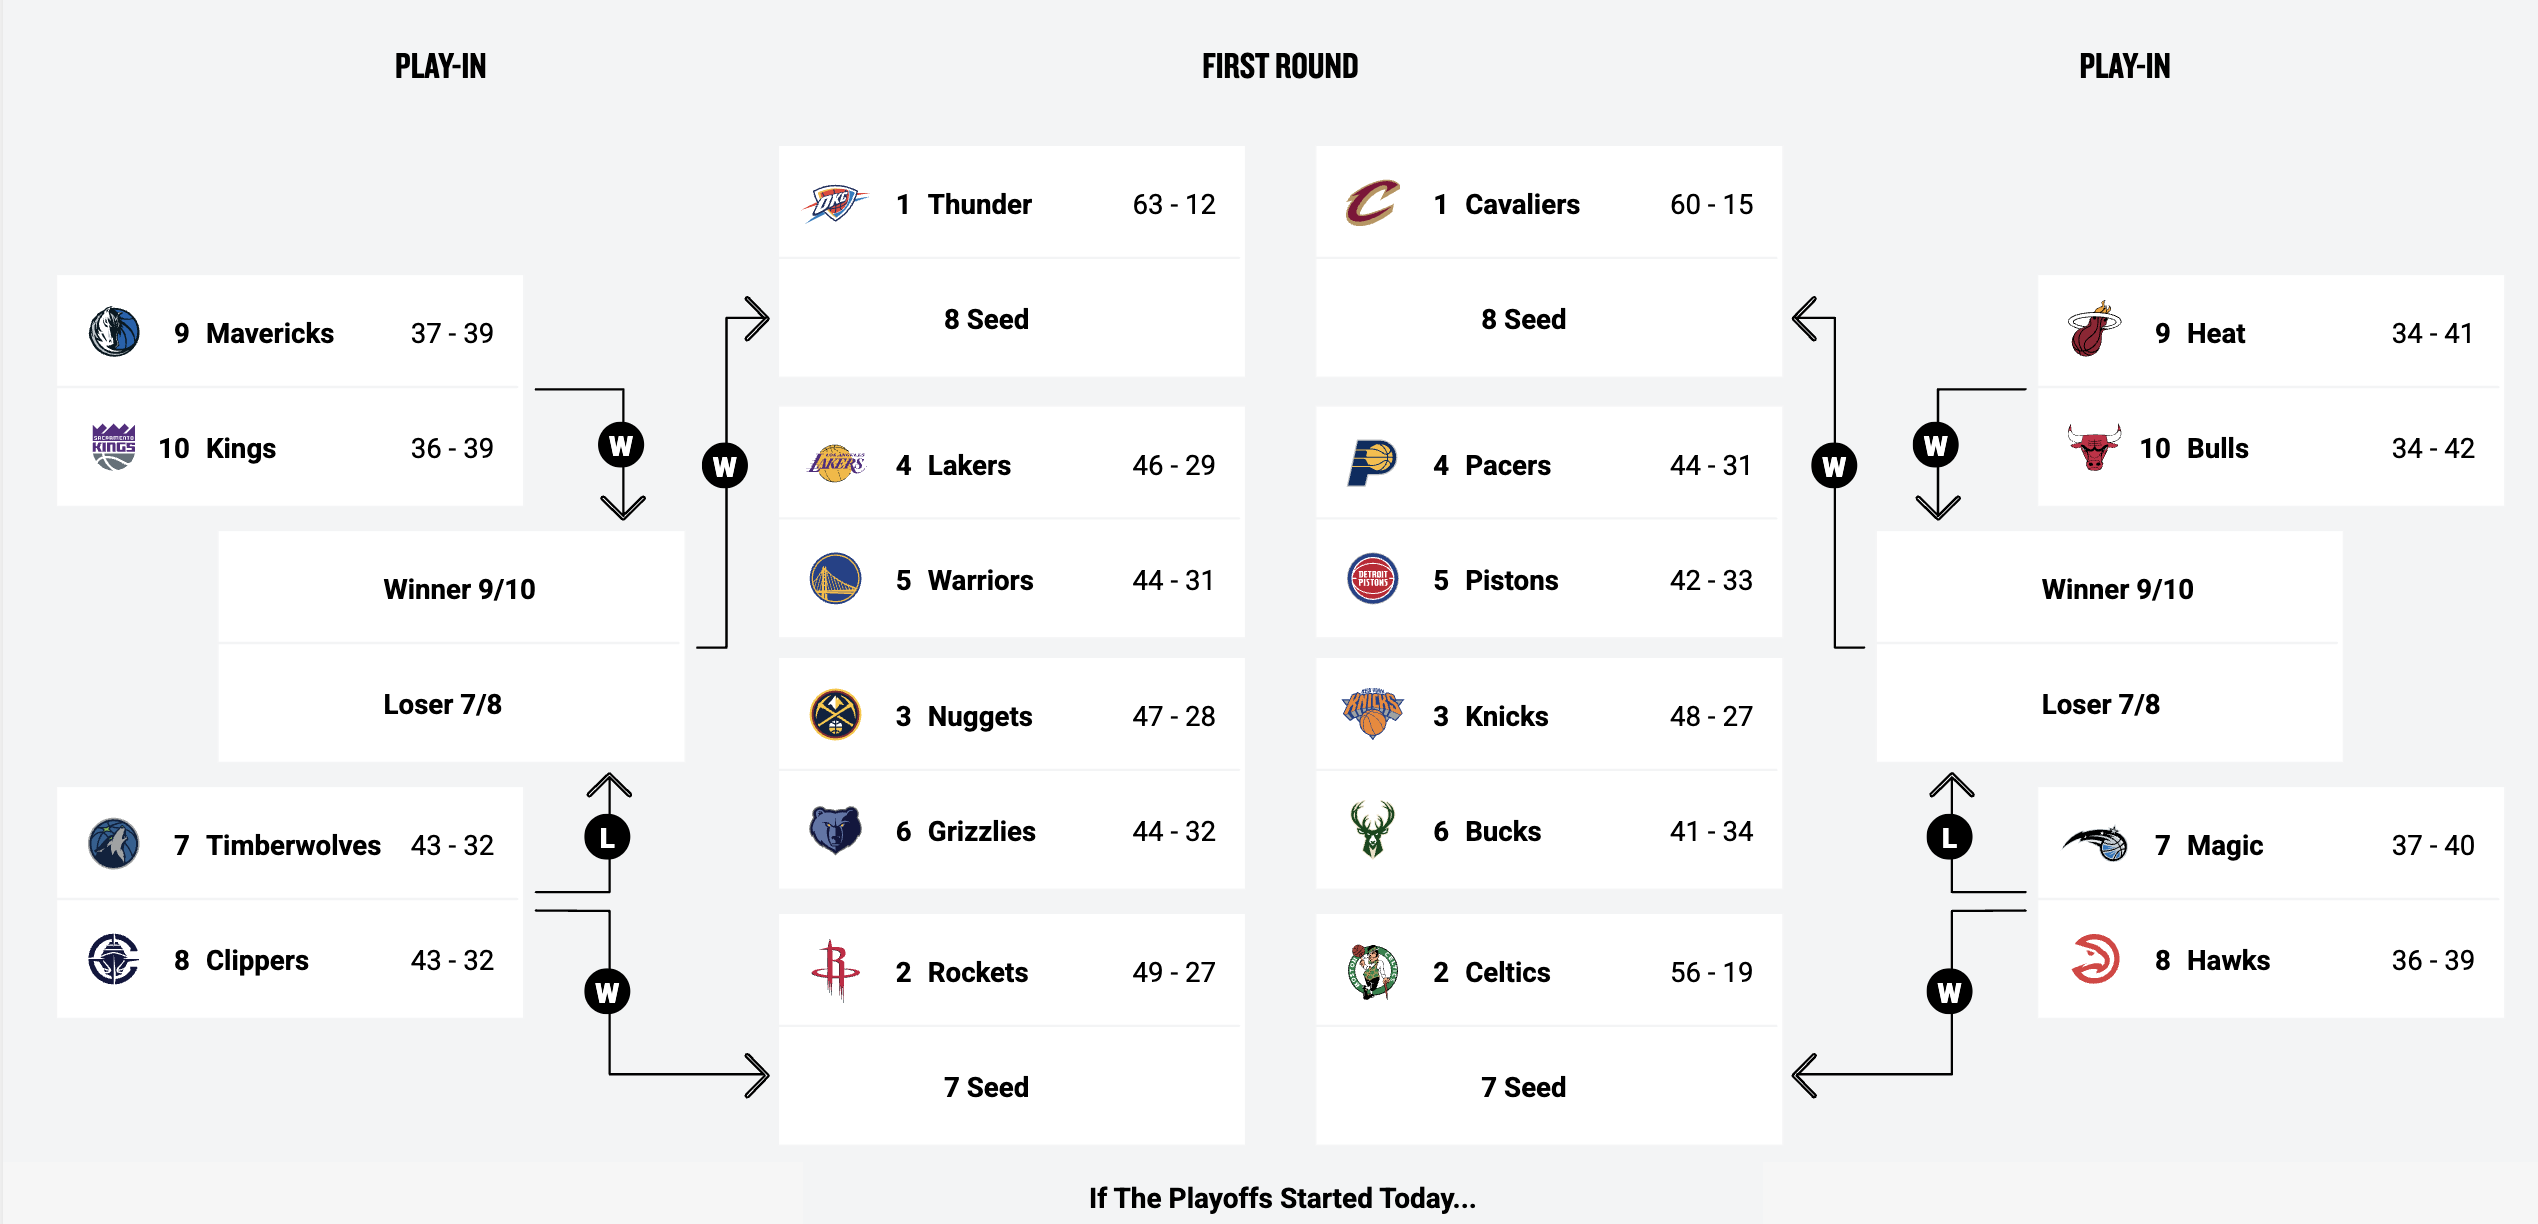

In [60]:
df_schedule['TEAM_NAME'].unique()

array(['Memphis Grizzlies', 'Oklahoma City Thunder', 'Brooklyn Nets',
       'Chicago Bulls', 'Orlando Magic', 'Boston Celtics',
       'Sacramento Kings', 'Los Angeles Lakers', 'Dallas Mavericks',
       'Houston Rockets', 'LA Clippers', 'Indiana Pacers',
       'Washington Wizards', 'Utah Jazz', 'Miami Heat',
       'Charlotte Hornets', 'Toronto Raptors', 'Golden State Warriors',
       'Minnesota Timberwolves', 'Cleveland Cavaliers', 'Phoenix Suns',
       'Detroit Pistons', 'Philadelphia 76ers', 'Milwaukee Bucks',
       'Atlanta Hawks', 'San Antonio Spurs', 'Portland Trail Blazers',
       'New York Knicks', 'New Orleans Pelicans', 'Denver Nuggets'],
      dtype=object)

In [100]:
team_abbreviation_map = {
    # Western Conference Teams
    'OKC': 'Oklahoma City Thunder',
    'HOU': 'Houston Rockets',
    'DEN': 'Denver Nuggets',
    'LAL': 'Los Angeles Lakers',
    'GSW': 'Golden State Warriors',
    'MEM': 'Memphis Grizzlies',
    'DAL': 'Dallas Mavericks',
    'SAC': 'Sacramento Kings',
    'MIN': 'Minnesota Timberwolves',
    'LAC': 'Los Angeles Clippers',

    # Eastern Conference Teams
    'CLE': 'Cleveland Cavaliers',
    'BOS': 'Boston Celtics',
    'NYK': 'New York Knicks',
    'IND': 'Indiana Pacers',
    'DET': 'Detroit Pistons',
    'MIL': 'Milwaukee Bucks',
    'MIA': 'Miami Heat',
    'CHI': 'Chicago Bulls',
    'ORL': 'Orlando Magic',
    'ATL': 'Atlanta Hawks'
}

# List of teams from the bracket
playoff_teams = [
    # Western Conference Teams
    'Oklahoma City Thunder', 'Houston Rockets', 'Denver Nuggets', 'Los Angeles Lakers', 
    'Golden State Warriors', 'Memphis Grizzlies', 'Dallas Mavericks', 'Sacramento Kings', 
    'Minnesota Timberwolves', 'Los Angeles Clippers',

    # Eastern Conference Teams
    'Cleveland Cavaliers', 'Boston Celtics', 'New York Knicks', 'Indiana Pacers', 
    'Detroit Pistons', 'Milwaukee Bucks', 'Miami Heat', 'Chicago Bulls', 
    'Orlando Magic', 'Atlanta Hawks'
]


def extract_opponent(row):
    matchup = row['MATCHUP']
    team_name = row['TEAM_NAME']
    
    # Extract abbreviation of the opponent team
    if 'vs.' in matchup:
        opponent_abbr = matchup.split('vs. ')[1]
    elif '@' in matchup:
        opponent_abbr = matchup.split('@ ')[1]
    else:
        return None
    
    # Convert abbreviation to full name using the mapping dictionary
    opponent_name = team_abbreviation_map.get(opponent_abbr, None)
    
    # Return the opponent name if it's in the playoff team list, otherwise None
    if opponent_name in playoff_teams:
        return opponent_name
    else:
        return None

# Apply the function to create the 'OPPONENT' column
df_schedule['OPPONENT'] = df_schedule.apply(extract_opponent, axis=1)

In [125]:
western_teams = ['Oklahoma City Thunder', 'Houston Rockets', 'Denver Nuggets', 'Los Angeles Lakers', 
    'Golden State Warriors', 'Memphis Grizzlies', 'Dallas Mavericks', 'Sacramento Kings', 
    'Minnesota Timberwolves', 'Los Angeles Clippers']
eastern_teams = ['Cleveland Cavaliers', 'Boston Celtics', 'New York Knicks', 'Indiana Pacers', 
    'Detroit Pistons', 'Milwaukee Bucks', 'Miami Heat', 'Chicago Bulls', 
    'Orlando Magic', 'Atlanta Hawks']

In [126]:
df_schedule.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,OPPONENT
2,22024,1610612763,MEM,Memphis Grizzlies,0022401093,2025-03-31,MEM vs. BOS,L,240,103,...,5,40,45,21,9,3,10,16,-14.0,Boston Celtics
3,22024,1610612760,OKC,Oklahoma City Thunder,0022401094,2025-03-31,OKC vs. CHI,W,240,145,...,9,35,44,39,11,6,14,16,28.0,Chicago Bulls
4,22024,1610612751,BKN,Brooklyn Nets,0022401095,2025-03-31,BKN @ DAL,W,240,113,...,7,33,40,32,6,3,8,23,4.0,Dallas Mavericks
5,22024,1610612741,CHI,Chicago Bulls,0022401094,2025-03-31,CHI @ OKC,L,240,117,...,10,33,43,29,7,7,19,16,-28.0,Oklahoma City Thunder
6,22024,1610612753,ORL,Orlando Magic,0022401091,2025-03-31,ORL vs. LAC,L,241,87,...,6,26,32,18,10,4,14,17,-9.0,Los Angeles Clippers


In [127]:

# Filter the main dataframe to only include games involving these teams
filtered_df = df_schedule[df_schedule['TEAM_NAME'].isin(western_teams) & df_schedule['OPPONENT'].isin(western_teams)]



In [128]:
filtered_df.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,OPPONENT
9,22024,1610612747,LAL,Los Angeles Lakers,0022401096,2025-03-31,LAL vs. HOU,W,242,104,...,10,35,45,22,11,6,11,15,6.0,Houston Rockets
11,22024,1610612745,HOU,Houston Rockets,0022401096,2025-03-31,HOU @ LAL,L,241,98,...,10,41,51,26,7,5,15,20,-6.0,Los Angeles Lakers
36,22024,1610612763,MEM,Memphis Grizzlies,0022401078,2025-03-29,MEM vs. LAL,L,240,127,...,9,32,41,33,7,4,12,27,-7.0,Los Angeles Lakers
46,22024,1610612747,LAL,Los Angeles Lakers,0022401078,2025-03-29,LAL @ MEM,W,238,134,...,8,34,42,30,7,3,13,21,7.0,Memphis Grizzlies
65,22024,1610612763,MEM,Memphis Grizzlies,0022401064,2025-03-27,MEM @ OKC,L,238,104,...,5,31,36,28,9,4,18,20,-21.0,Oklahoma City Thunder


In [129]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265 entries, 9 to 2251
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   SEASON_ID          265 non-null    object        
 1   TEAM_ID            265 non-null    int64         
 2   TEAM_ABBREVIATION  265 non-null    object        
 3   TEAM_NAME          265 non-null    object        
 4   GAME_ID            265 non-null    object        
 5   GAME_DATE          265 non-null    datetime64[ns]
 6   MATCHUP            265 non-null    object        
 7   WL                 265 non-null    object        
 8   MIN                265 non-null    int64         
 9   PTS                265 non-null    int64         
 10  FGM                265 non-null    int64         
 11  FGA                265 non-null    int64         
 12  FG_PCT             265 non-null    float64       
 13  FG3M               265 non-null    int64         
 14  FG3A          

In [130]:
# Calculate win rates between each matchup
matchup_results = filtered_df.groupby(['TEAM_NAME', 'OPPONENT', 'WL']).size().reset_index(name='Count')

# Pivot the table to have separate columns for Wins and Losses
matchup_pivot = matchup_results.pivot(index=['TEAM_NAME', 'OPPONENT'], columns='WL', values='Count').fillna(0)

# Add a Total Games column and Win Rate calculation
matchup_pivot['Total Games'] = matchup_pivot.sum(axis=1)

if 'W' in matchup_pivot.columns:
    matchup_pivot['Win Rate'] = (matchup_pivot['W'] / matchup_pivot['Total Games']) * 100
else:
    matchup_pivot['Win Rate'] = 0  # No wins recorded for that matchup

# Reset the index for better visualization
matchup_pivot.reset_index(inplace=True)

### HEAD TO HEAD WIN RATE

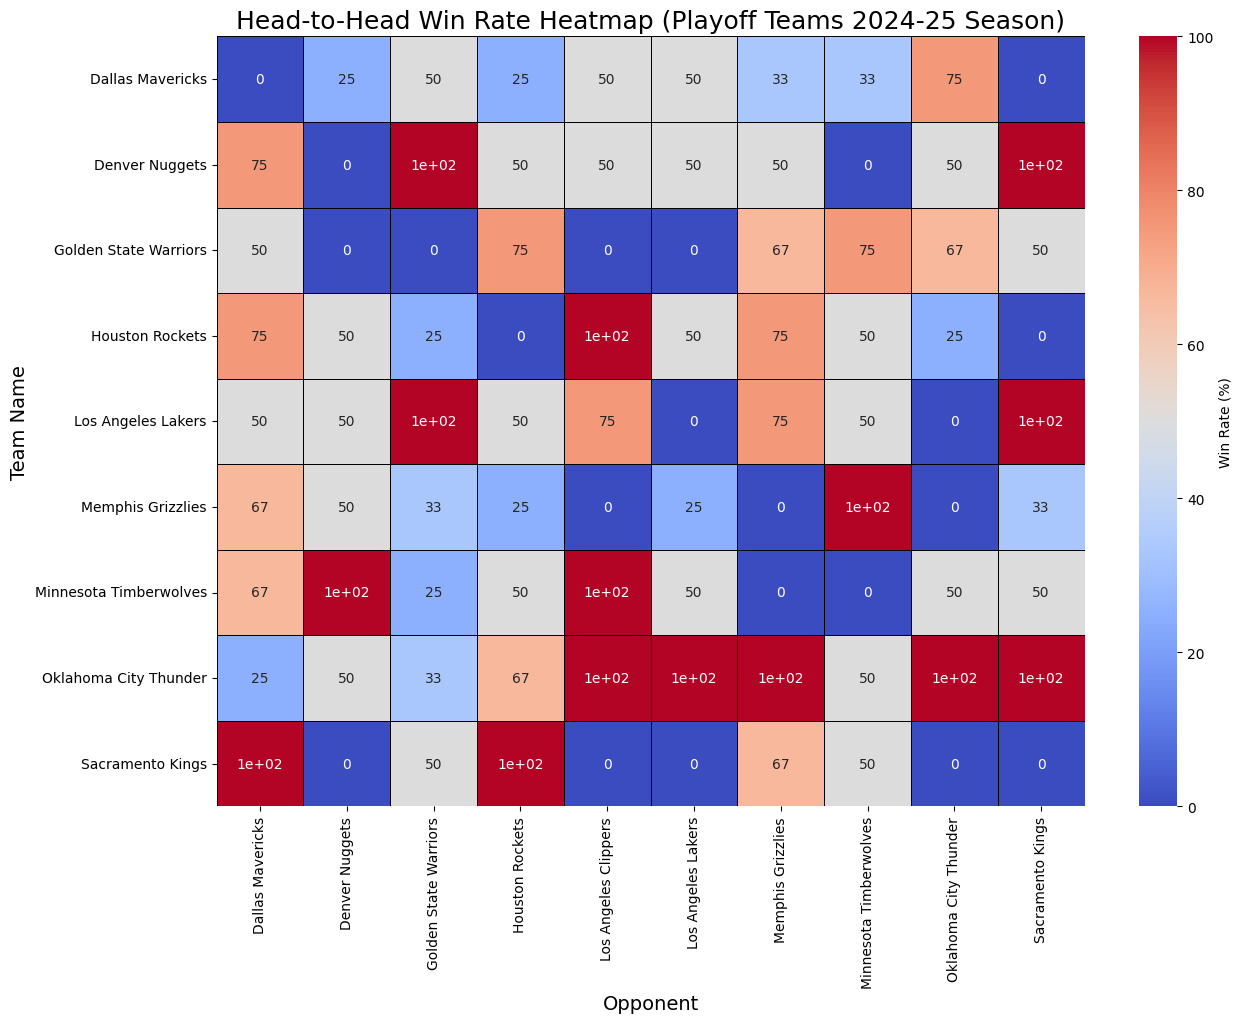

In [131]:
heatmap_data = matchup_pivot.pivot_table(index='TEAM_NAME', columns='OPPONENT', values='Win Rate', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=.5, linecolor='black', cbar_kws={'label': 'Win Rate (%)'})

plt.title('Head-to-Head Win Rate Heatmap (Playoff Teams 2024-25 Season)', fontsize=18)
plt.xlabel('Opponent', fontsize=14)
plt.ylabel('Team Name', fontsize=14)
plt.show()

In [132]:
# Calculate total games and wins for each team against playoff teams
team_wins = filtered_df[filtered_df['WL'] == 'W'].groupby('TEAM_NAME').size()
team_total_games = filtered_df.groupby('TEAM_NAME').size()

# Calculate Win Percentage
playoff_win_percentage = (team_wins / team_total_games) * 100
playoff_win_percentage = playoff_win_percentage.fillna(0).sort_values(ascending=False)

# Convert to DataFrame for visualization
playoff_win_df = playoff_win_percentage.reset_index()
playoff_win_df.columns = ['TEAM_NAME', 'Win% Against Playoff Teams']

/var/folders/5n/r6b07v4s5cs3379jq_dtb8q00000gn/T/ipykernel_8135/4275752822.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TEAM_NAME', y='Win% Against Playoff Teams', data=playoff_win_df, palette='viridis')


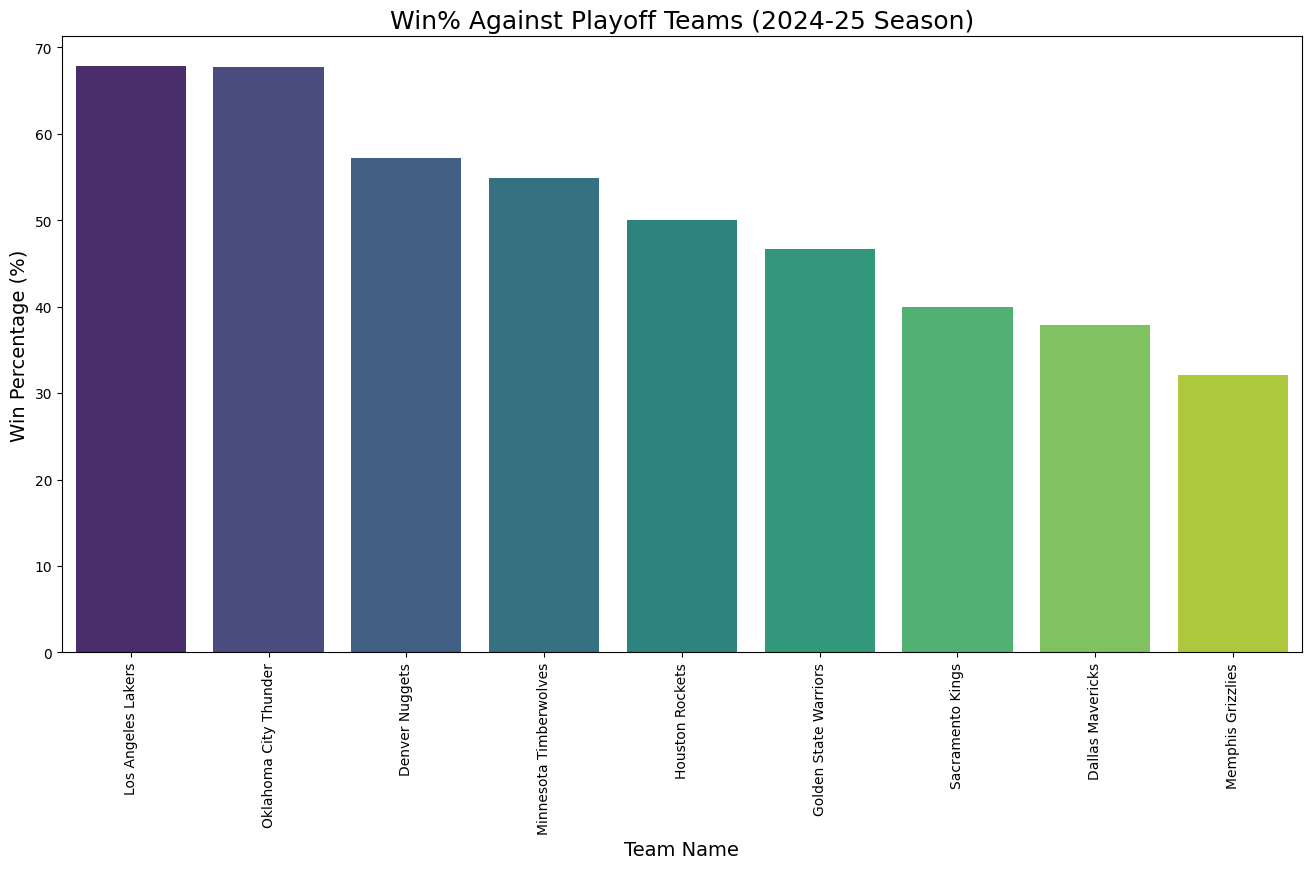

In [133]:
plt.figure(figsize=(16, 8))
sns.barplot(x='TEAM_NAME', y='Win% Against Playoff Teams', data=playoff_win_df, palette='viridis')

plt.title('Win% Against Playoff Teams (2024-25 Season)', fontsize=18)
plt.xlabel('Team Name', fontsize=14)
plt.ylabel('Win Percentage (%)', fontsize=14)
plt.xticks(rotation=90)
plt.show()

Top Performers:

Los Angeles Lakers and Oklahoma City Thunder have the highest win percentages against other playoff teams, both around 70%.

This suggests they are strong contenders and can handle tough competition.

Middle Performers:

Denver Nuggets, Minnesota Timberwolves, Houston Rockets, and Golden State Warriors are clustered around the 50%-60% range.

These teams are competitive but not dominant against other top teams.

Bottom Performers:

Sacramento Kings, Dallas Mavericks, and Memphis Grizzlies are below 50%, with the Grizzlies having the lowest performance against playoff teams.

This suggests they might be struggling more against stronger opponents.

In [134]:
# Calculate total wins and games for all playoff teams
total_wins = df_schedule[(df_schedule['TEAM_NAME'].isin(playoff_teams)) & (df_schedule['WL'] == 'W')].groupby('TEAM_NAME').size()
total_games = df_schedule[df_schedule['TEAM_NAME'].isin(playoff_teams)].groupby('TEAM_NAME').size()

# Calculate Overall Win Percentage
overall_win_percentage = (total_wins / total_games) * 100
overall_win_percentage = overall_win_percentage.fillna(0).sort_values(ascending=False)

# Convert to DataFrame
overall_win_df = overall_win_percentage.reset_index()
overall_win_df.columns = ['TEAM_NAME', 'Overall Win%']

# Merge the overall win percentage with the playoff-only win percentage
comparison_df = pd.merge(playoff_win_df, overall_win_df, on='TEAM_NAME')

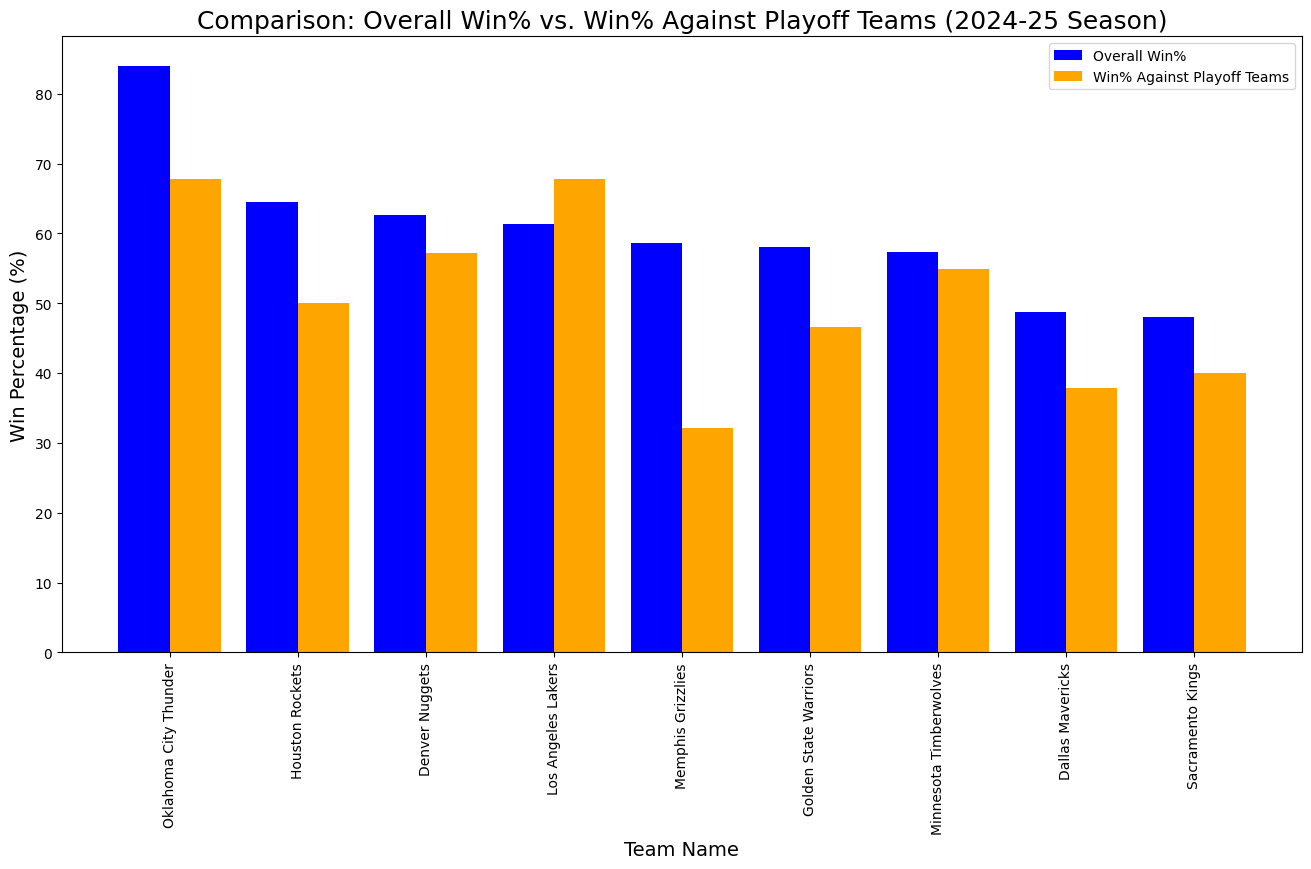

In [135]:
# Sort by Overall Win% for consistency
comparison_df = comparison_df.sort_values(by='Overall Win%', ascending=False)

plt.figure(figsize=(16, 8))
bar_width = 0.4
indices = range(len(comparison_df))

# Plotting the two win percentages side by side
plt.bar(indices, comparison_df['Overall Win%'], width=bar_width, label='Overall Win%', color='blue')
plt.bar([i + bar_width for i in indices], comparison_df['Win% Against Playoff Teams'], width=bar_width, label='Win% Against Playoff Teams', color='orange')

plt.title('Comparison: Overall Win% vs. Win% Against Playoff Teams (2024-25 Season)', fontsize=18)
plt.xlabel('Team Name', fontsize=14)
plt.ylabel('Win Percentage (%)', fontsize=14)
plt.xticks([i + bar_width / 2 for i in indices], comparison_df['TEAM_NAME'], rotation=90)
plt.legend()
plt.show()

INTERESTING INSIGHT

OKC has a great chance of win in all reg and playoff

It is interesting that LA Lakers got middle positon in reg but highest winning rate in playoff

Memphis Grizzlies got good winning rate in overall but bad compare to playoff team

In [136]:
df_schedule.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,OPPONENT
2,22024,1610612763,MEM,Memphis Grizzlies,0022401093,2025-03-31,MEM vs. BOS,L,240,103,...,5,40,45,21,9,3,10,16,-14.0,Boston Celtics
3,22024,1610612760,OKC,Oklahoma City Thunder,0022401094,2025-03-31,OKC vs. CHI,W,240,145,...,9,35,44,39,11,6,14,16,28.0,Chicago Bulls
4,22024,1610612751,BKN,Brooklyn Nets,0022401095,2025-03-31,BKN @ DAL,W,240,113,...,7,33,40,32,6,3,8,23,4.0,Dallas Mavericks
5,22024,1610612741,CHI,Chicago Bulls,0022401094,2025-03-31,CHI @ OKC,L,240,117,...,10,33,43,29,7,7,19,16,-28.0,Oklahoma City Thunder
6,22024,1610612753,ORL,Orlando Magic,0022401091,2025-03-31,ORL vs. LAC,L,241,87,...,6,26,32,18,10,4,14,17,-9.0,Los Angeles Clippers


In [137]:
eastern_playoff_teams = [
    'Cleveland Cavaliers', 'Boston Celtics', 'New York Knicks', 'Indiana Pacers', 
    'Detroit Pistons', 'Milwaukee Bucks', 'Miami Heat', 'Chicago Bulls', 
    'Orlando Magic', 'Atlanta Hawks'
]

# Filter the main dataframe to only include games involving these teams
eastern_registered = df_schedule[
    (df_schedule['TEAM_NAME'].isin(eastern_playoff_teams)) &
    (df_schedule['OPPONENT'].isin(eastern_playoff_teams))
]

In [138]:
eastern_registered

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,OPPONENT
26,22024,1610612749,MIL,Milwaukee Bucks,0022401083,2025-03-30,MIL vs. ATL,L,241,124,...,6,30,36,21,5,2,14,24,-21.0,Atlanta Hawks
27,22024,1610612737,ATL,Atlanta Hawks,0022401083,2025-03-30,ATL @ MIL,W,242,145,...,15,31,46,36,10,2,8,29,21.0,Milwaukee Bucks
50,22024,1610612752,NYK,New York Knicks,0022401070,2025-03-28,NYK @ MIL,W,239,116,...,14,30,44,28,12,1,8,14,9.0,Milwaukee Bucks
51,22024,1610612739,CLE,Cleveland Cavaliers,0022401067,2025-03-28,CLE @ DET,L,241,122,...,11,30,41,16,9,3,14,27,-11.0,Detroit Pistons
55,22024,1610612749,MIL,Milwaukee Bucks,0022401070,2025-03-28,MIL vs. NYK,L,242,107,...,3,29,32,24,2,3,16,14,-9.0,New York Knicks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,22024,1610612754,IND,Indiana Pacers,0022400063,2024-10-23,IND @ DET,W,241,115,...,7,32,39,32,10,8,15,23,6.0,Detroit Pistons
2241,22024,1610612753,ORL,Orlando Magic,0022400065,2024-10-23,ORL @ MIA,W,238,116,...,18,39,57,28,8,8,11,21,19.0,Miami Heat
2246,22024,1610612765,DET,Detroit Pistons,0022400063,2024-10-23,DET vs. IND,L,241,109,...,12,26,38,22,6,2,12,21,-6.0,Indiana Pacers
2249,22024,1610612738,BOS,Boston Celtics,0022400061,2024-10-22,BOS vs. NYK,W,240,132,...,11,29,40,33,6,3,3,15,23.0,New York Knicks


In [139]:
# Calculate total wins and games for all eastern playoff teams
eastern_wins = eastern_registered[eastern_registered['WL'] == 'W'].groupby('TEAM_NAME').size()
eastern_total_games = eastern_registered.groupby('TEAM_NAME').size()

# Calculate Win Percentage
eastern_win_percentage = (eastern_wins / eastern_total_games) * 100
eastern_win_percentage = eastern_win_percentage.fillna(0).sort_values(ascending=False)

# Convert to DataFrame
eastern_win_df = eastern_win_percentage.reset_index()
eastern_win_df.columns = ['TEAM_NAME', 'Win% Against Eastern Playoff Teams']


/var/folders/5n/r6b07v4s5cs3379jq_dtb8q00000gn/T/ipykernel_8135/1776064726.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TEAM_NAME', y='Win% Against Eastern Playoff Teams', data=eastern_win_df, palette='viridis')


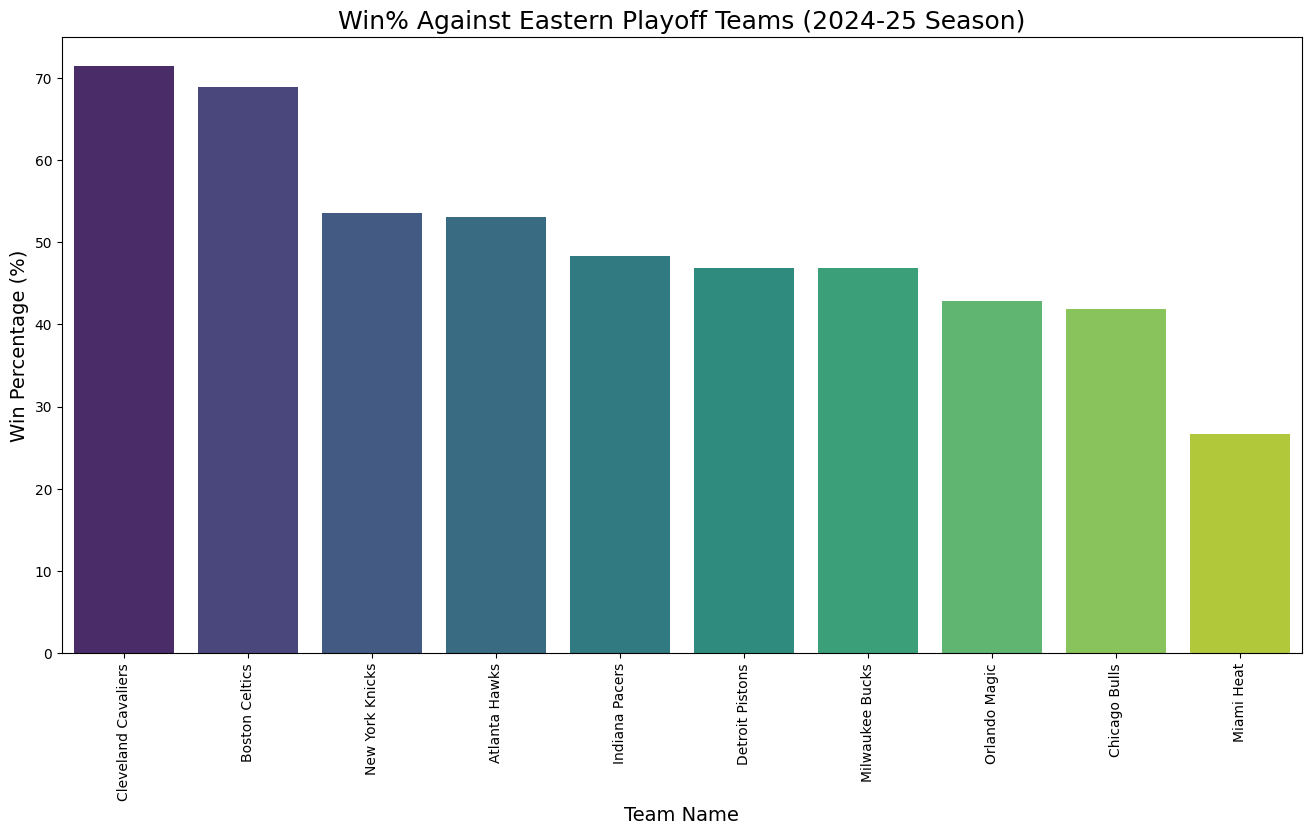

In [140]:
plt.figure(figsize=(16, 8))
sns.barplot(x='TEAM_NAME', y='Win% Against Eastern Playoff Teams', data=eastern_win_df, palette='viridis')

plt.title('Win% Against Eastern Playoff Teams (2024-25 Season)', fontsize=18)
plt.xlabel('Team Name', fontsize=14)
plt.ylabel('Win Percentage (%)', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [141]:
# Calculate total wins and games for all eastern playoff teams
eastern_total_wins = df_schedule[(df_schedule['TEAM_NAME'].isin(eastern_playoff_teams)) & (df_schedule['WL'] == 'W')].groupby('TEAM_NAME').size()
eastern_total_games = df_schedule[df_schedule['TEAM_NAME'].isin(eastern_playoff_teams)].groupby('TEAM_NAME').size()

# Calculate Overall Win Percentage
eastern_overall_win_percentage = (eastern_total_wins / eastern_total_games) * 100
eastern_overall_win_percentage = eastern_overall_win_percentage.fillna(0).sort_values(ascending=False)

# Convert to DataFrame
eastern_overall_win_df = eastern_overall_win_percentage.reset_index()
eastern_overall_win_df.columns = ['TEAM_NAME', 'Overall Win%']

In [142]:
# Merge the overall win percentage with the playoff-only win percentage
comparison_df2 = pd.merge(eastern_win_df, eastern_overall_win_df, on='TEAM_NAME')

# Sort by Overall Win% for consistency
comparison_df2 = comparison_df2.sort_values(by='Overall Win%', ascending=False)


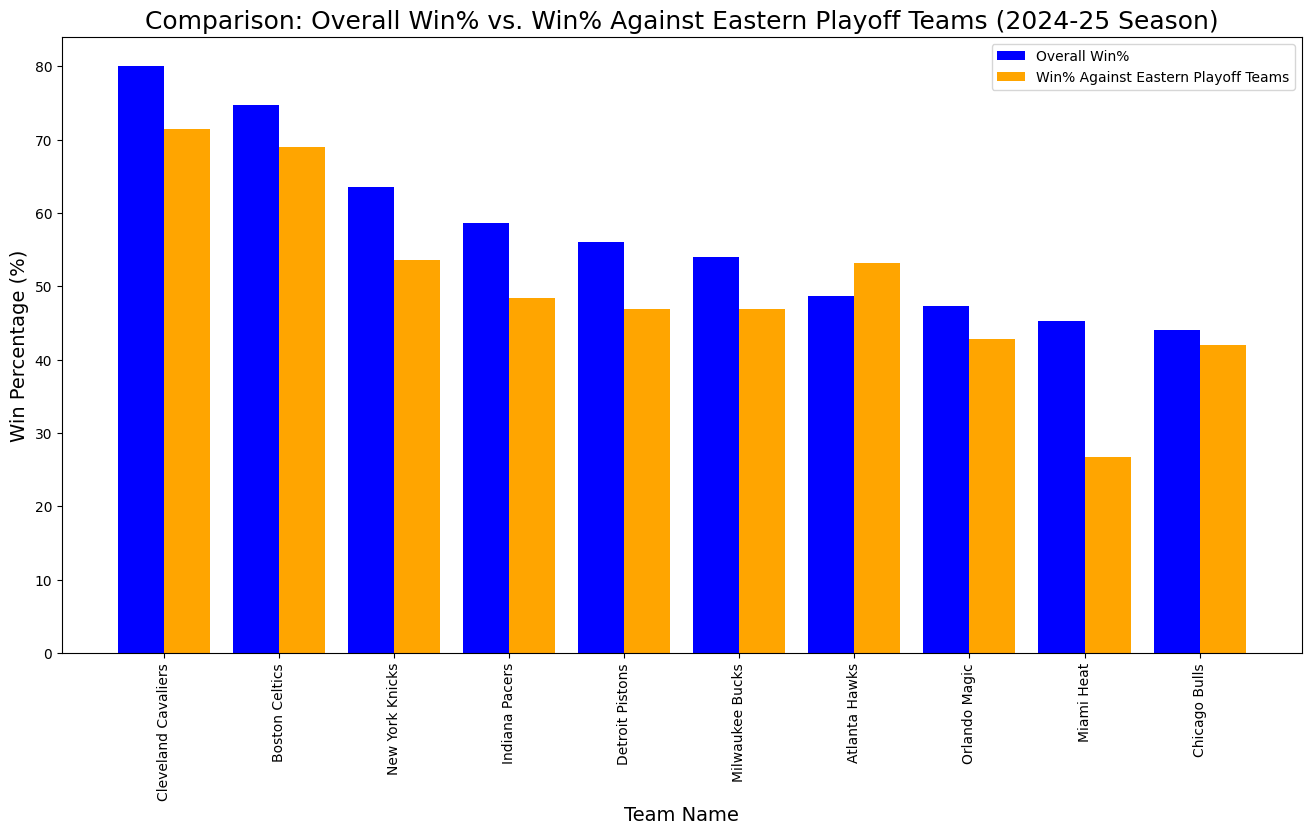

In [143]:
plt.figure(figsize=(16, 8))
bar_width = 0.4
indices = range(len(comparison_df2))

# Plotting the two win percentages side by side
plt.bar(indices, comparison_df2['Overall Win%'], width=bar_width, label='Overall Win%', color='blue')
plt.bar([i + bar_width for i in indices], comparison_df2['Win% Against Eastern Playoff Teams'], width=bar_width, label='Win% Against Eastern Playoff Teams', color='orange')

plt.title('Comparison: Overall Win% vs. Win% Against Eastern Playoff Teams (2024-25 Season)', fontsize=18)
plt.xlabel('Team Name', fontsize=14)
plt.ylabel('Win Percentage (%)', fontsize=14)
plt.xticks([i + bar_width / 2 for i in indices], comparison_df2['TEAM_NAME'], rotation=90)
plt.legend()
plt.show()